In [1]:
# project uses the caltech101 dataset found here https://data.caltech.edu/records/mzrjq-6wc02

%pip install tensorflow
%pip install keras
%pip install matplotlib
%pip install tensorflow_datasets
%pip install numpy
%pip install seaborn

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load dataset
train_data, val_data, test_data = tfds.load('caltech101', split=['train[:80%]', 'train[80%:]', 'test'], shuffle_files=True, as_supervised=True)

print(f"Training set size: {len(list(train_data))}")
print(f"Validation set size: {len(list(val_data))}")
print(f"Test set size: {len(list(test_data))}")

for image, label in train_data.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

info = tfds.builder('caltech101').info
class_names = info.features['label'].names
print(f"Total classes: {len(class_names)}")



2024-10-30 19:30:30.802237: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2024-10-30 19:30:31.362848: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training set size: 2448


2024-10-30 19:30:31.654185: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation set size: 612
Test set size: 6084
Image shape: (297, 300, 3)
Label: 10
Total classes: 102


2024-10-30 19:30:33.920841: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


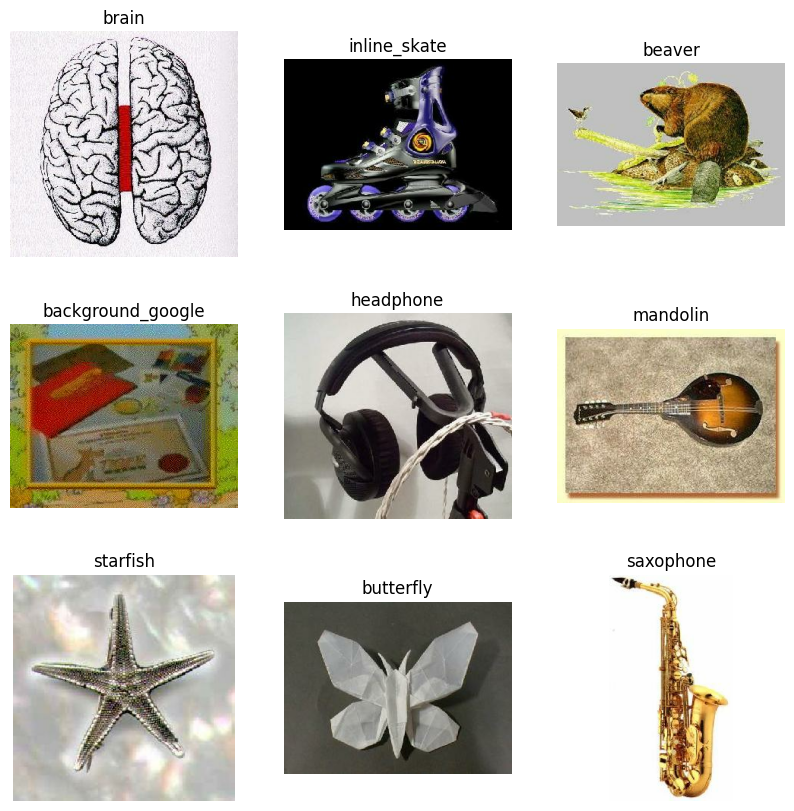

In [3]:
fig = plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(9)):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(image.numpy())
    ax.set_title(class_names[label.numpy()])
    ax.axis('off')
plt.show()

In [4]:
# Counting instances per class
import collections
label_counts = collections.Counter([label.numpy() for _, label in train_data])
print(label_counts)


Counter({np.int64(54): 29, np.int64(46): 28, np.int64(16): 28, np.int64(47): 27, np.int64(40): 27, np.int64(52): 27, np.int64(58): 27, np.int64(72): 27, np.int64(98): 27, np.int64(96): 27, np.int64(55): 27, np.int64(29): 27, np.int64(27): 27, np.int64(100): 27, np.int64(21): 27, np.int64(94): 26, np.int64(43): 26, np.int64(15): 26, np.int64(74): 26, np.int64(59): 26, np.int64(30): 26, np.int64(84): 26, np.int64(75): 26, np.int64(20): 26, np.int64(0): 26, np.int64(51): 25, np.int64(7): 25, np.int64(45): 25, np.int64(97): 25, np.int64(36): 25, np.int64(73): 25, np.int64(17): 25, np.int64(44): 25, np.int64(65): 25, np.int64(81): 25, np.int64(31): 25, np.int64(77): 25, np.int64(89): 25, np.int64(83): 25, np.int64(4): 24, np.int64(13): 24, np.int64(70): 24, np.int64(8): 24, np.int64(92): 24, np.int64(23): 24, np.int64(25): 24, np.int64(39): 24, np.int64(50): 24, np.int64(12): 24, np.int64(9): 24, np.int64(28): 24, np.int64(91): 24, np.int64(53): 24, np.int64(3): 24, np.int64(68): 24, np.int

In [5]:
# Print all label names
print("Class Names:")
for i, class_name in enumerate(class_names):
    print(f"{i}: {class_name}")

Class Names:
0: accordion
1: airplanes
2: anchor
3: ant
4: background_google
5: barrel
6: bass
7: beaver
8: binocular
9: bonsai
10: brain
11: brontosaurus
12: buddha
13: butterfly
14: camera
15: cannon
16: car_side
17: ceiling_fan
18: cellphone
19: chair
20: chandelier
21: cougar_body
22: cougar_face
23: crab
24: crayfish
25: crocodile
26: crocodile_head
27: cup
28: dalmatian
29: dollar_bill
30: dolphin
31: dragonfly
32: electric_guitar
33: elephant
34: emu
35: euphonium
36: ewer
37: faces
38: faces_easy
39: ferry
40: flamingo
41: flamingo_head
42: garfield
43: gerenuk
44: gramophone
45: grand_piano
46: hawksbill
47: headphone
48: hedgehog
49: helicopter
50: ibis
51: inline_skate
52: joshua_tree
53: kangaroo
54: ketch
55: lamp
56: laptop
57: leopards
58: llama
59: lobster
60: lotus
61: mandolin
62: mayfly
63: menorah
64: metronome
65: minaret
66: motorbikes
67: nautilus
68: octopus
69: okapi
70: pagoda
71: panda
72: pigeon
73: pizza
74: platypus
75: pyramid
76: revolver
77: rhino
78: r

Training set size after filtering: 2424
Validation set size after filtering: 606


2024-10-30 19:30:36.014324: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Test set size after filtering: 5647
Image shape: (297, 300, 3)
Label: 10


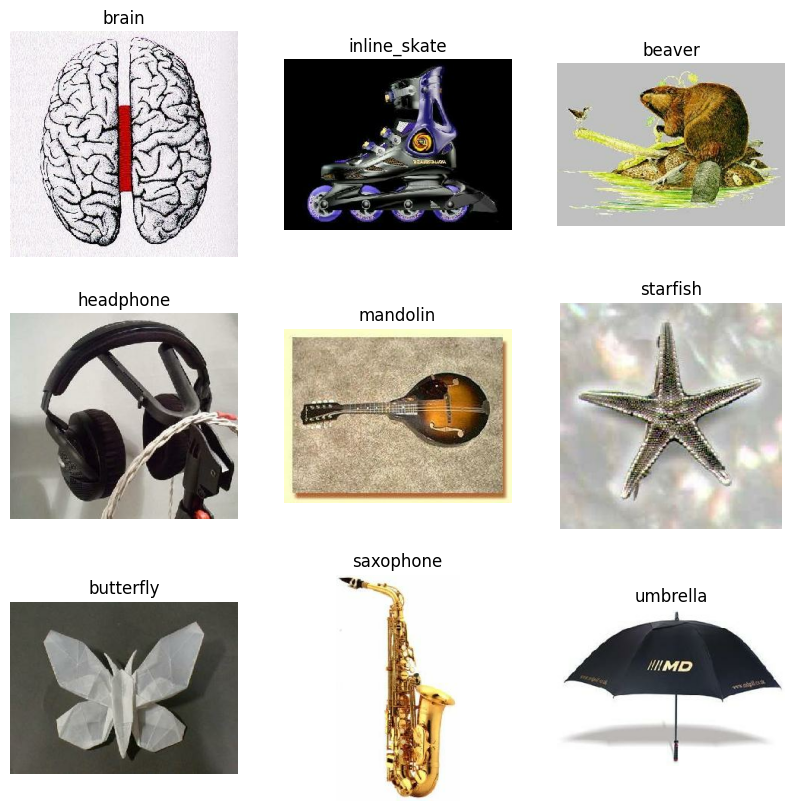

Counter({np.int64(54): 29, np.int64(46): 28, np.int64(16): 28, np.int64(47): 27, np.int64(40): 27, np.int64(52): 27, np.int64(58): 27, np.int64(72): 27, np.int64(98): 27, np.int64(96): 27, np.int64(55): 27, np.int64(29): 27, np.int64(27): 27, np.int64(100): 27, np.int64(21): 27, np.int64(94): 26, np.int64(43): 26, np.int64(15): 26, np.int64(74): 26, np.int64(59): 26, np.int64(30): 26, np.int64(84): 26, np.int64(75): 26, np.int64(20): 26, np.int64(0): 26, np.int64(51): 25, np.int64(7): 25, np.int64(45): 25, np.int64(97): 25, np.int64(36): 25, np.int64(73): 25, np.int64(17): 25, np.int64(44): 25, np.int64(65): 25, np.int64(81): 25, np.int64(31): 25, np.int64(77): 25, np.int64(89): 25, np.int64(83): 25, np.int64(13): 24, np.int64(70): 24, np.int64(8): 24, np.int64(92): 24, np.int64(23): 24, np.int64(25): 24, np.int64(39): 24, np.int64(50): 24, np.int64(12): 24, np.int64(9): 24, np.int64(28): 24, np.int64(91): 24, np.int64(53): 24, np.int64(3): 24, np.int64(68): 24, np.int64(69): 24, np.in

In [6]:
# Get class names and find the index of "google_background"
info = tfds.builder('caltech101').info
class_names = info.features['label'].names
google_background_index = class_names.index("background_google")

# Define a filter function to exclude "google_background"
def filter_google_background(image, label):
    return tf.not_equal(label, google_background_index)

# Apply the filter to each dataset split
train_data = train_data.filter(filter_google_background)
val_data = val_data.filter(filter_google_background)
test_data = test_data.filter(filter_google_background)

# Verifying the dataset sizes after filtering
print(f"Training set size after filtering: {len(list(train_data))}")
print(f"Validation set size after filtering: {len(list(val_data))}")
print(f"Test set size after filtering: {len(list(test_data))}")

# Print the first image and label from the filtered training set
for image, label in train_data.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

# Visualize a few filtered images
fig = plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(9)):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(image.numpy())
    ax.set_title(class_names[label.numpy()])
    ax.axis('off')
plt.show()

# Counting instances per class after filtering
label_counts = collections.Counter([label.numpy() for _, label in train_data])
print(label_counts)

In [7]:
# Resize images
def resize_image(image, label):
    image = tf.image.resize(image, [128, 128])
    return image, label

train_data = train_data.map(resize_image)
val_data = val_data.map(resize_image)
test_data = test_data.map(resize_image)

# Normalize images
def normalize_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_data = train_data.map(normalize_image)
val_data = val_data.map(normalize_image)
test_data = test_data.map(normalize_image)

# Edge detection
def edge_detection(image, label):
    # Convert image to grayscale
    image_gray = tf.image.rgb_to_grayscale(image)
    # Add batch dimension to the grayscale image
    image_gray = tf.expand_dims(image_gray, axis=0)
    # Apply Sobel edge detection
    edges = tf.image.sobel_edges(image_gray)
    edge_x = edges[..., 0]
    edge_y = edges[..., 1]
    # Combine the edges
    edges = tf.sqrt(tf.square(edge_x) + tf.square(edge_y))
    # Remove the extra dimension
    edges = tf.squeeze(edges, axis=0)
    edges = tf.clip_by_value(edges, 0.0, 1.0)
    return edges, label

train_data = train_data.map(edge_detection)
val_data = val_data.map(edge_detection)
test_data = test_data.map(edge_detection)

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.25),
    tf.keras.layers.RandomContrast(0.25),
    tf.keras.layers.RandomZoom(0.25),
    tf.keras.layers.RandomTranslation(0.25, 0.25)
])

# Function to apply augmentation
def augment_image(image, label):
    image = data_augmentation(image)
    return image, label

# Function to expand training data with augmentation
def expand_training_data(train_data, n_augments):
    augmented_datasets = [train_data]  # Original data

    for _ in range(n_augments):
        augmented_data = train_data.map(augment_image)
        augmented_datasets.append(augmented_data)

    # Concatenate the original and augmented datasets
    full_train_data = augmented_datasets[0]
    for aug_data in augmented_datasets[1:]:
        full_train_data = full_train_data.concatenate(aug_data)

    return full_train_data

# Generate expanded training data
# train_data = expand_training_data(train_data, n_augments=1)
# train_data_size = len(list(train_data))
# train_data = train_data.shuffle(buffer_size=train_data_size)

# Apply batching and prefetching without one-hot encoding
train_data = train_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
val_data = val_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

In [8]:
print(f"Training set size: {len(list(train_data))}")
print(f"Validation set size: {len(list(val_data))}")
print(f"Test set size: {len(list(test_data))}")

for image, label in train_data.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

Training set size: 75
Validation set size: 18
Test set size: 176
Image shape: (32, 128, 128, 1)
Label: [10 51  7 47 61 87 13 79 94 54 99 40 88 60 70 78 45 97 46  8 60 67  7 19
 36 52 47 49 26 43 92 58]


2024-10-30 19:30:45.302500: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [9]:

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
model.compile(    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)


Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     75/Unknown 35s 420ms/step - accuracy: 0.0120 - loss: 4.6270

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 449ms/step - accuracy: 0.0121 - loss: 4.6257 - val_accuracy: 0.0543 - val_loss: 4.1435
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 445ms/step - accuracy: 0.1533 - loss: 3.8064 - val_accuracy: 0.2286 - val_loss: 3.4949
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 406ms/step - accuracy: 0.5162 - loss: 2.0271 - val_accuracy: 0.2615 - val_loss: 3.9762
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 394ms/step - accuracy: 0.7609 - loss: 0.9191 - val_accuracy: 0.2434 - val_loss: 5.2341
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 379ms/step - accuracy: 0.8924 - loss: 0.3719 - val_accuracy: 0.2697 - val_loss: 6.6186
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 400ms/step - accuracy: 0.9271 - loss: 0.2945 - val_accuracy: 0.2303 - val_loss: 7.2038
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 444ms/step - accuracy: 0.9431 - loss: 0.2294 - val_accuracy: 0.2484 - val_loss: 6.8473
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 349ms/step - accuracy: 0.9610 - loss: 0.1777 - val_accuracy: 0.282

2024-10-30 19:34:54.206841: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 358ms/step - accuracy: 0.9843 - loss: 0.0619 - val_accuracy: 0.2516 - val_loss: 7.9574
Epoch 10/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 389ms/step - accuracy: 0.9956 - loss: 0.0141 - val_accuracy: 0.2747 - val_loss: 8.7646


176/176 ━━━━━━━━━━━━━━━━━━━━ 22s 124ms/step
Accuracy: 42.67%


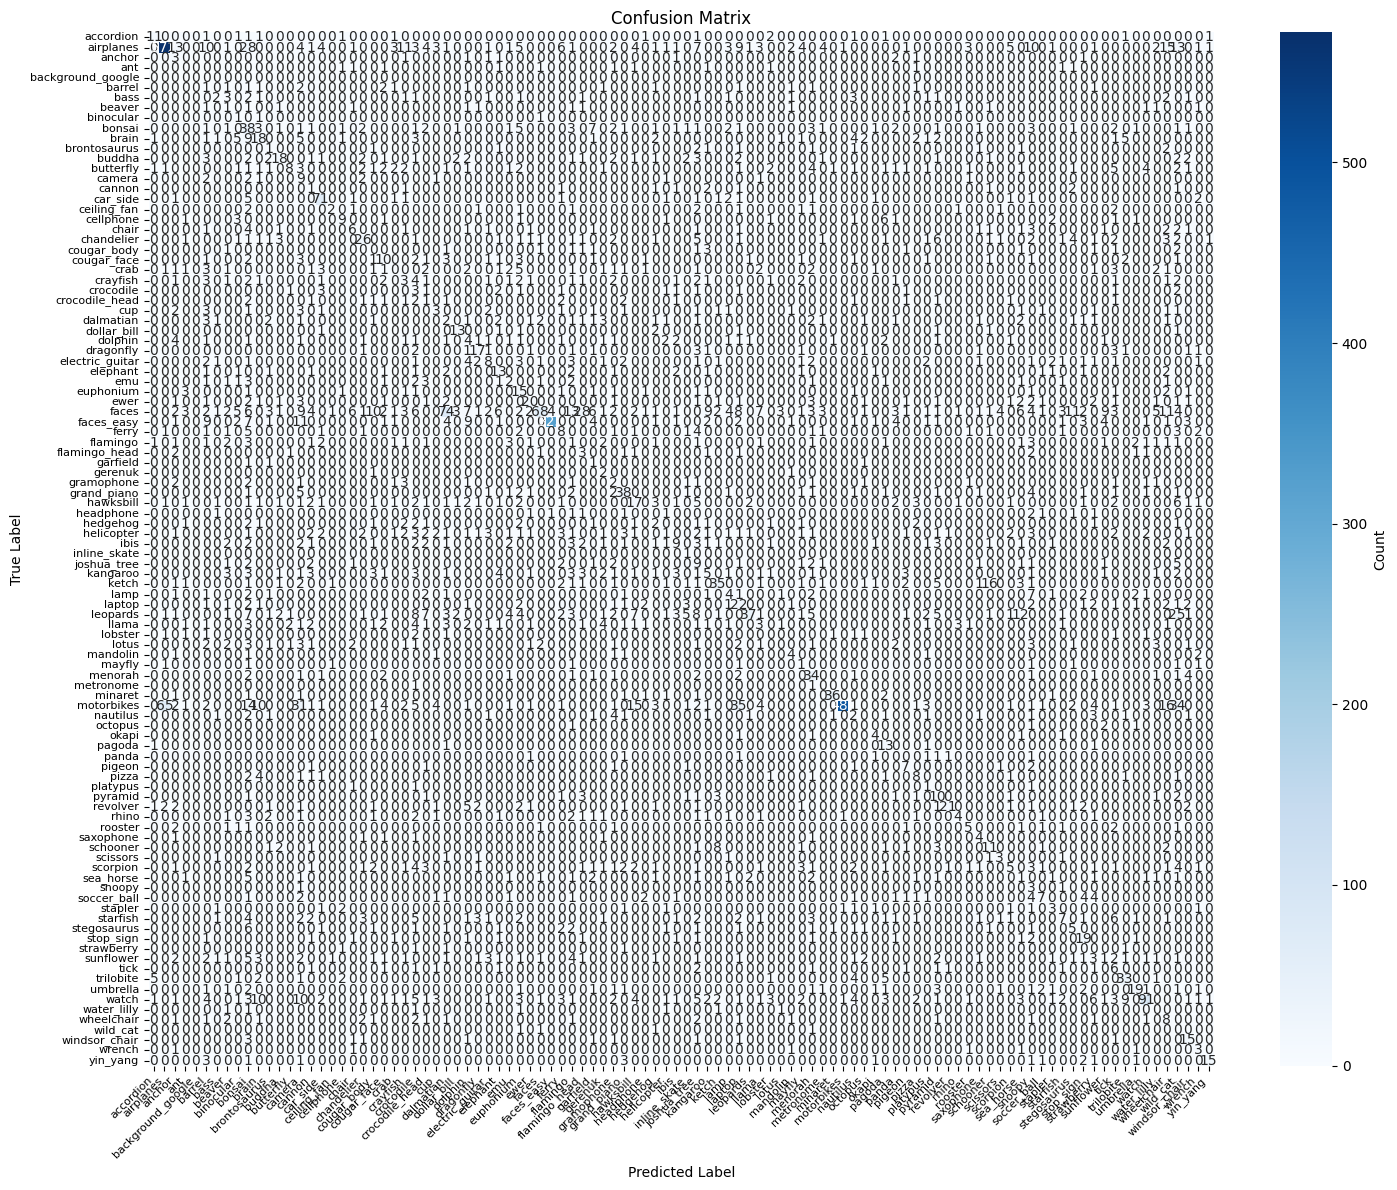

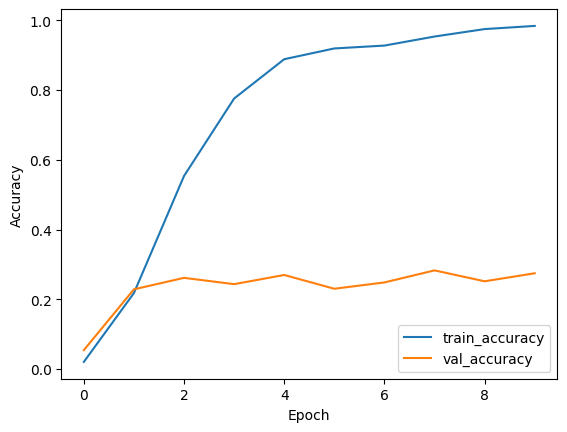

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def print_results():
    # Extract test images and labels from the test dataset
    test_images, test_labels = zip(*[(image, label) for image, label in tfds.as_numpy(test_data)])
    test_images = np.array([image for batch in test_images for image in batch])
    test_labels = np.array([label for batch in test_labels for label in batch])

    # Generate predictions
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)

    # Calculate accuracy manually
    accuracy = np.sum(predicted_classes == test_labels) / len(test_labels)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Calculate confusion matrix
    num_classes = len(class_names)
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for true, pred in zip(test_labels, predicted_classes):
        confusion_matrix[true, pred] += 1

    # Plot confusion matrix
    plt.figure(figsize=(15, 12))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names, cbar_kws={'label': 'Count'})
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=45, ha="right", fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

    # Plot training history
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()
print_results()


Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     75/Unknown 31s 396ms/step - accuracy: 0.0095 - loss: 4.6279

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 34s 432ms/step - accuracy: 0.0096 - loss: 4.6269 - val_accuracy: 0.0263 - val_loss: 4.3497
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 448ms/step - accuracy: 0.0404 - loss: 4.5285 - val_accuracy: 0.0609 - val_loss: 4.1645
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 402ms/step - accuracy: 0.1100 - loss: 4.1600 - val_accuracy: 0.1168 - val_loss: 3.8504
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 34s 449ms/step - accuracy: 0.2210 - loss: 3.5467 - val_accuracy: 0.2039 - val_loss: 3.5218
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 404ms/step - accuracy: 0.3818 - loss: 2.7873 - val_accuracy: 0.2467 - val_loss: 3.3556
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 377ms/step - accuracy: 0.5319 - loss: 2.0418 - val_accuracy: 0.2747 - val_loss: 3.3874
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 407ms/step - accuracy: 0.6712 - loss: 1.4477 - val_accuracy: 0.2829 - val_loss: 3.5598
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 355ms/step - accuracy: 0.7777 - loss: 0.9709 - val_accuracy: 0.241

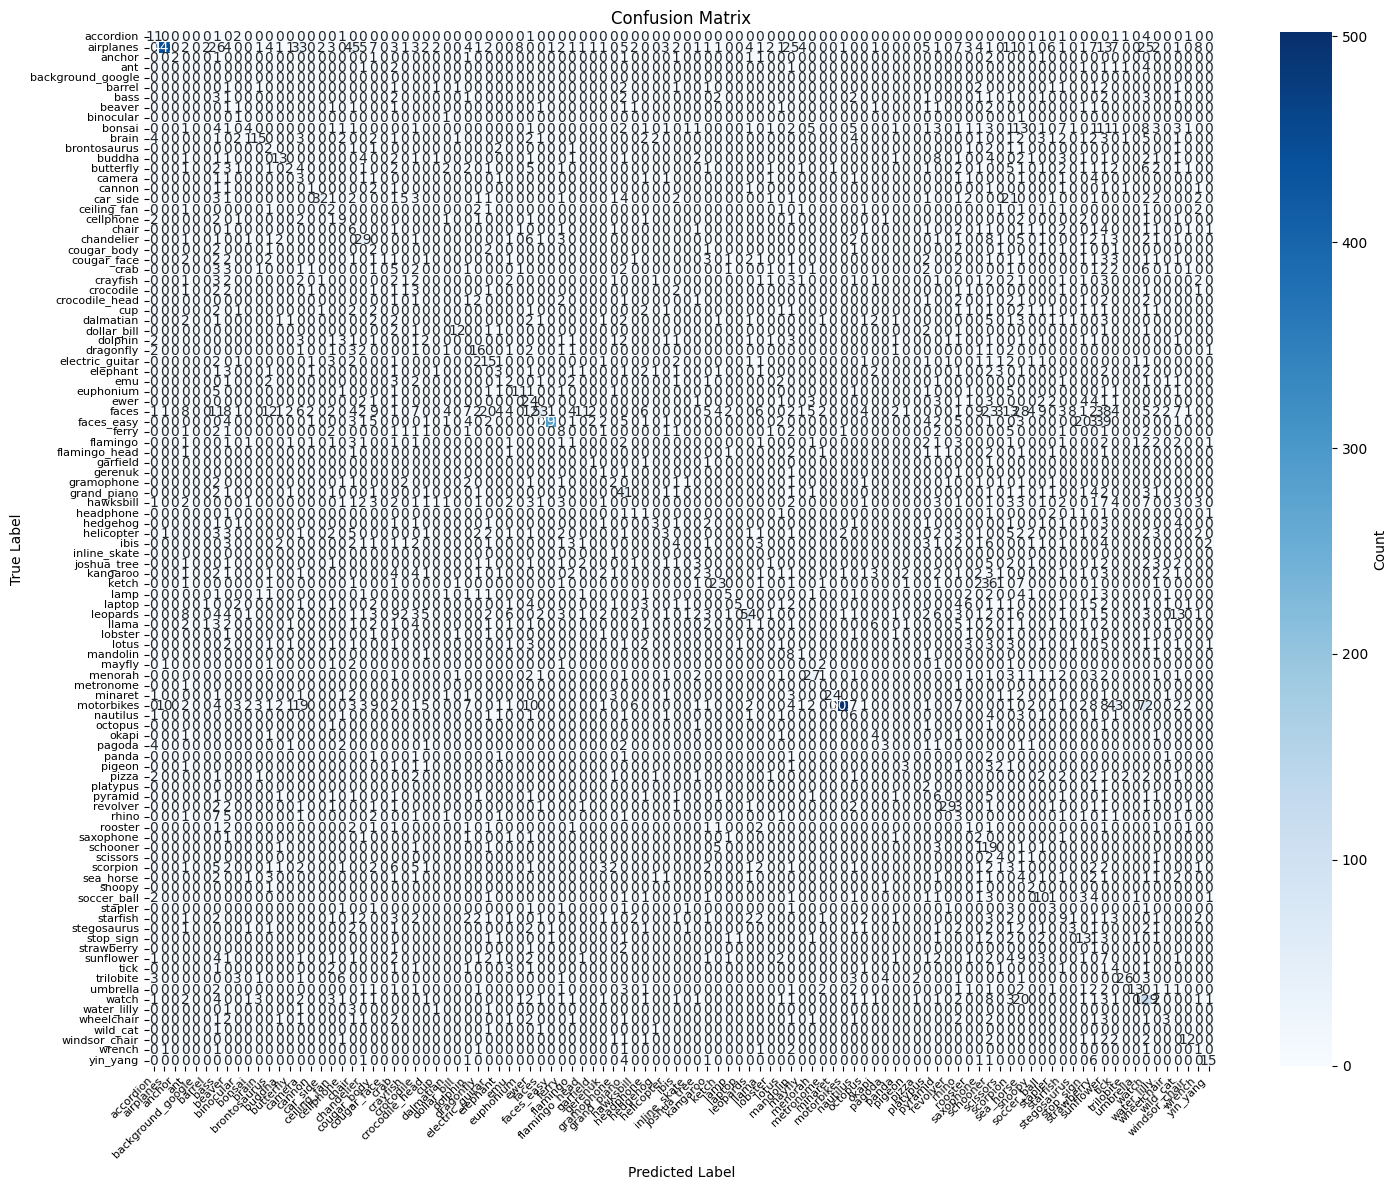

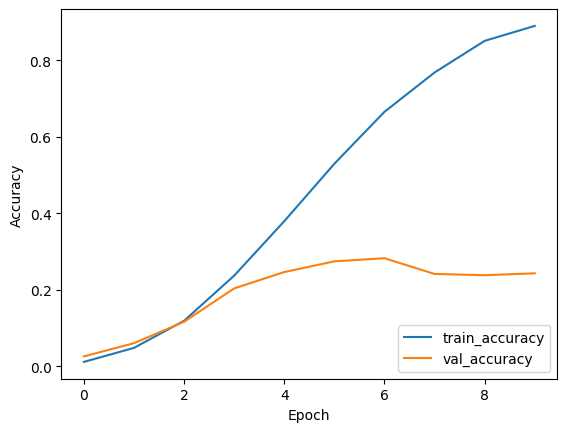

In [11]:

# model with slower learning rate
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()



Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     75/Unknown 28s 329ms/step - accuracy: 0.0100 - loss: 8.3335

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 357ms/step - accuracy: 0.0100 - loss: 8.2964 - val_accuracy: 0.0033 - val_loss: 4.3885
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 342ms/step - accuracy: 0.0114 - loss: 4.6182 - val_accuracy: 0.0033 - val_loss: 4.3936
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 350ms/step - accuracy: 0.0093 - loss: 4.6170 - val_accuracy: 0.0033 - val_loss: 4.3979
Epoch 4/10


2024-10-30 19:43:29.068602: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 240ms/step - accuracy: 0.0097 - loss: 4.6167 - val_accuracy: 0.0033 - val_loss: 4.4006
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 368ms/step - accuracy: 0.0079 - loss: 4.6166 - val_accuracy: 0.0033 - val_loss: 4.4026
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 369ms/step - accuracy: 0.0083 - loss: 4.6166 - val_accuracy: 0.0033 - val_loss: 4.4039
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 346ms/step - accuracy: 0.0065 - loss: 4.6167 - val_accuracy: 0.0033 - val_loss: 4.4047
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 368ms/step - accuracy: 0.0065 - loss: 4.6167 - val_accuracy: 0.0033 - val_loss: 4.4052
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 356ms/step - accuracy: 0.0065 - loss: 4.6167 - val_accuracy: 0.0033 - val_loss: 4.4056
Epoch 10/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 322ms/step - accuracy: 0.0076 - loss: 4.6167 - val_accuracy: 0.0033 - val_loss: 4.4058
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 99ms/step
Accuracy: 1.65%


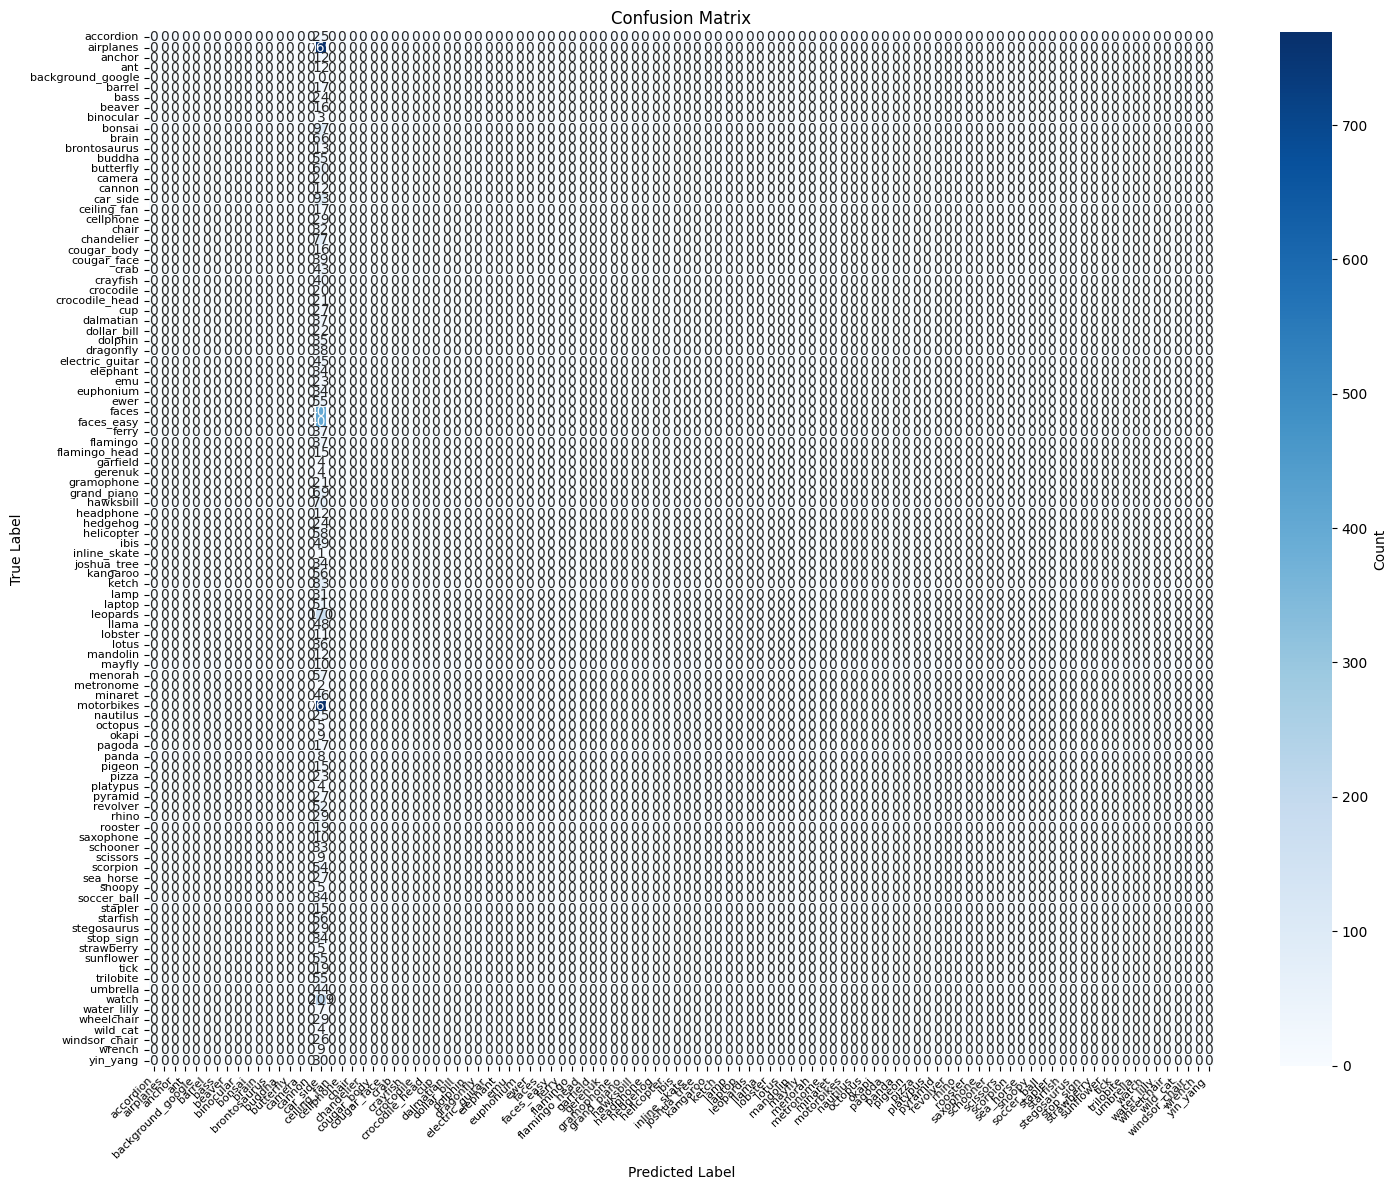

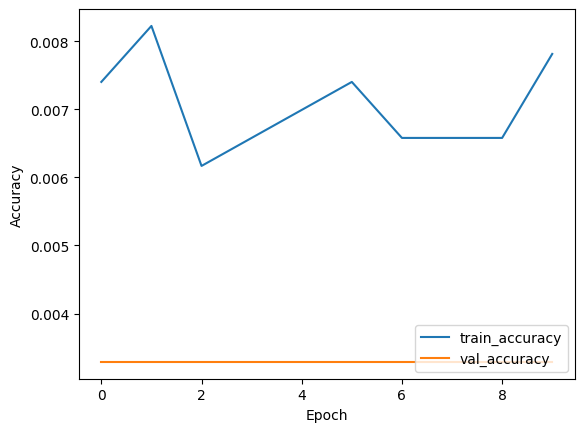

In [12]:

# model with faster learning rate
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     75/Unknown 29s 348ms/step - accuracy: 0.0093 - loss: 4.6382

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 369ms/step - accuracy: 0.0094 - loss: 4.6367 - val_accuracy: 0.0641 - val_loss: 4.1297
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 321ms/step - accuracy: 0.1316 - loss: 3.9686 - val_accuracy: 0.1875 - val_loss: 3.5537
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 389ms/step - accuracy: 0.3966 - loss: 2.6165 - val_accuracy: 0.2188 - val_loss: 3.6301
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 395ms/step - accuracy: 0.5505 - loss: 1.6746 - val_accuracy: 0.2237 - val_loss: 4.1195
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 432ms/step - accuracy: 0.7052 - loss: 1.1389 - val_accuracy: 0.2566 - val_loss: 4.5043
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 305ms/step - accuracy: 0.7776 - loss: 0.8361 - val_accuracy: 0.2714 - val_loss: 4.9260
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 408ms/step - accuracy: 0.8334 - loss: 0.5768 - val_accuracy: 0.2648 - val_loss: 5.2497
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 388ms/step - accuracy: 0.8665 - loss: 0.5031 - val_accuracy: 0.253

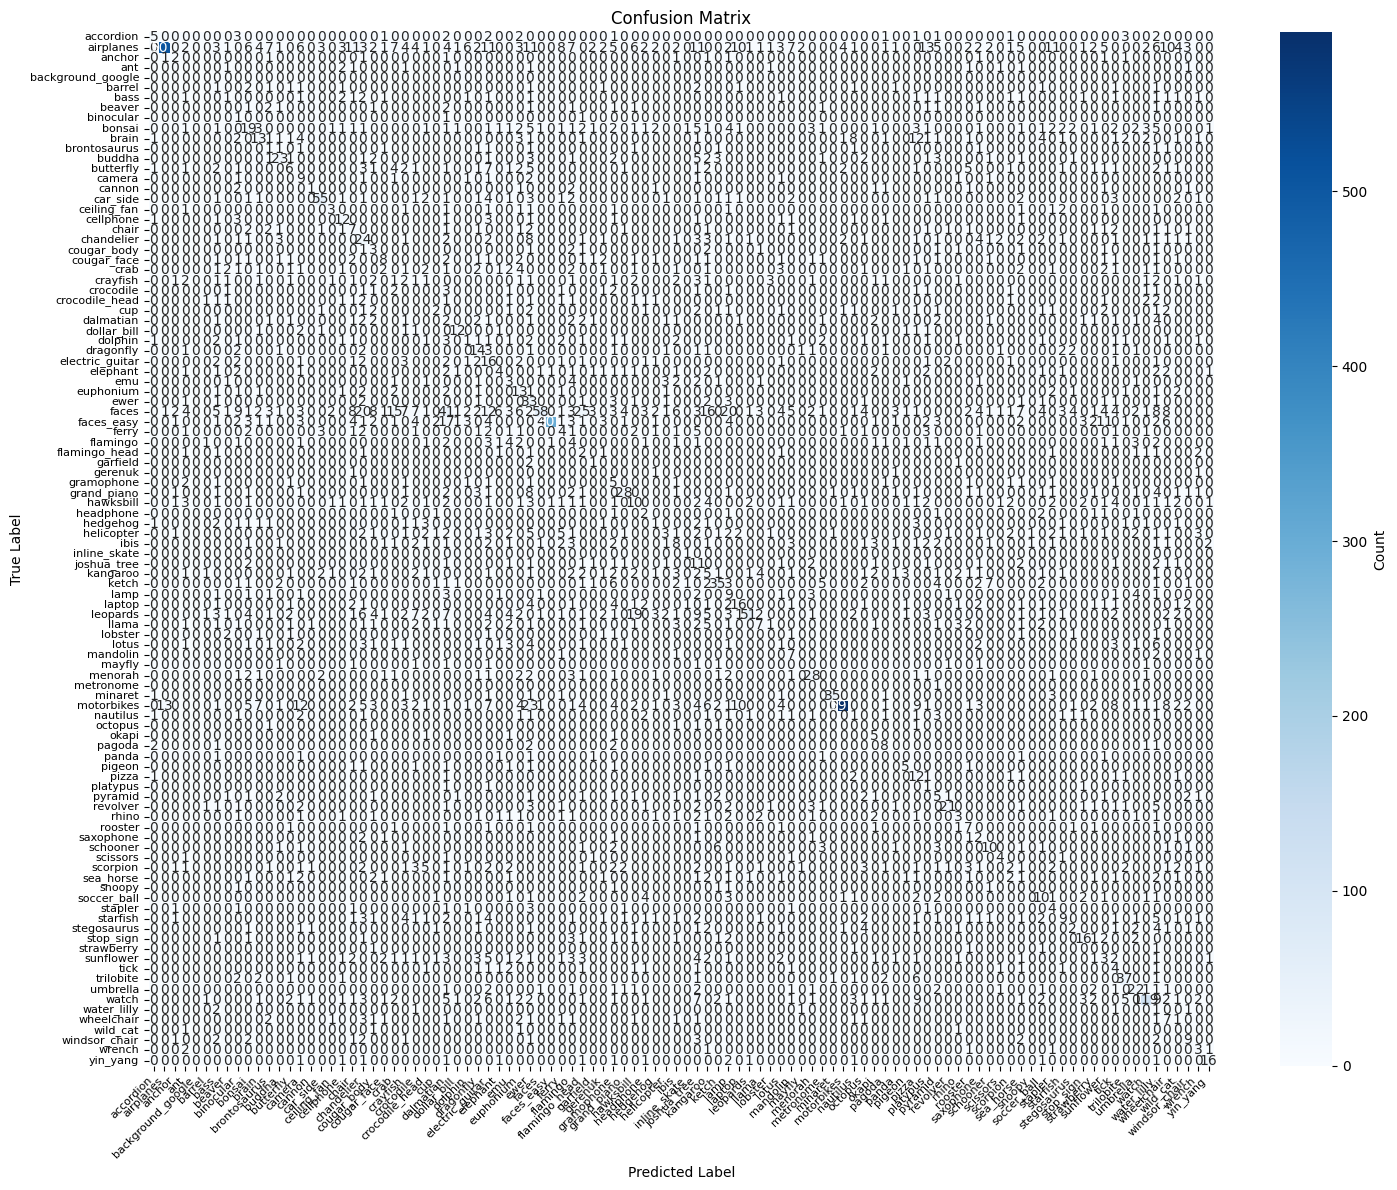

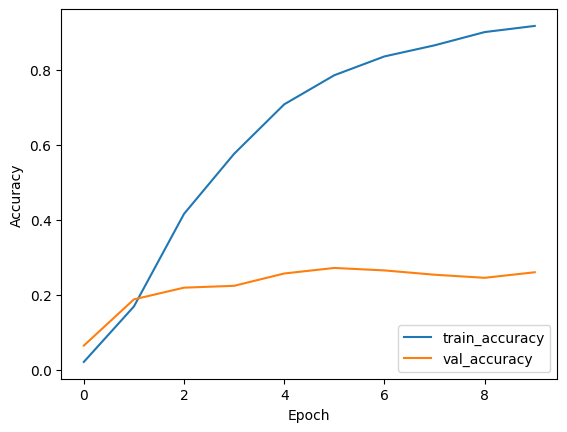

In [13]:

# model with dropout 0.2
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


Epoch 1/30


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     75/Unknown 29s 355ms/step - accuracy: 0.0230 - loss: 4.6311

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 385ms/step - accuracy: 0.0230 - loss: 4.6298 - val_accuracy: 0.0691 - val_loss: 4.1558
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 423ms/step - accuracy: 0.1214 - loss: 4.0202 - val_accuracy: 0.2056 - val_loss: 3.5279
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 422ms/step - accuracy: 0.3684 - loss: 2.6578 - val_accuracy: 0.2549 - val_loss: 3.3985
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 351ms/step - accuracy: 0.5650 - loss: 1.7027 - val_accuracy: 0.2648 - val_loss: 4.0713
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 408ms/step - accuracy: 0.7124 - loss: 1.1102 - val_accuracy: 0.2845 - val_loss: 4.1544
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 499ms/step - accuracy: 0.7856 - loss: 0.7716 - val_accuracy: 0.2993 - val_loss: 4.3952
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 365ms/step - accuracy: 0.8673 - loss: 0.5316 - val_accuracy: 0.2664 - val_loss: 5.4350
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 443ms/step - accuracy: 0.9060 - loss: 0.3403 - val_accuracy: 0.274

2024-10-30 19:59:31.119460: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 421ms/step - accuracy: 0.9683 - loss: 0.1032 - val_accuracy: 0.2632 - val_loss: 6.3963
Epoch 16/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 424ms/step - accuracy: 0.9732 - loss: 0.0939 - val_accuracy: 0.2730 - val_loss: 6.3516
Epoch 17/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 389ms/step - accuracy: 0.9713 - loss: 0.0846 - val_accuracy: 0.2763 - val_loss: 7.0413
Epoch 18/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 428ms/step - accuracy: 0.9747 - loss: 0.0969 - val_accuracy: 0.2747 - val_loss: 6.5384
Epoch 19/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 406ms/step - accuracy: 0.9783 - loss: 0.0736 - val_accuracy: 0.2845 - val_loss: 7.1650
Epoch 20/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 333ms/step - accuracy: 0.9752 - loss: 0.0717 - val_accuracy: 0.2730 - val_loss: 6.7885
Epoch 21/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 412ms/step - accuracy: 0.9771 - loss: 0.0627 - val_accuracy: 0.2845 - val_loss: 7.1367
Epoch 22/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 430ms/step - accuracy: 0.9796 - loss: 0.0795 - val_accuracy

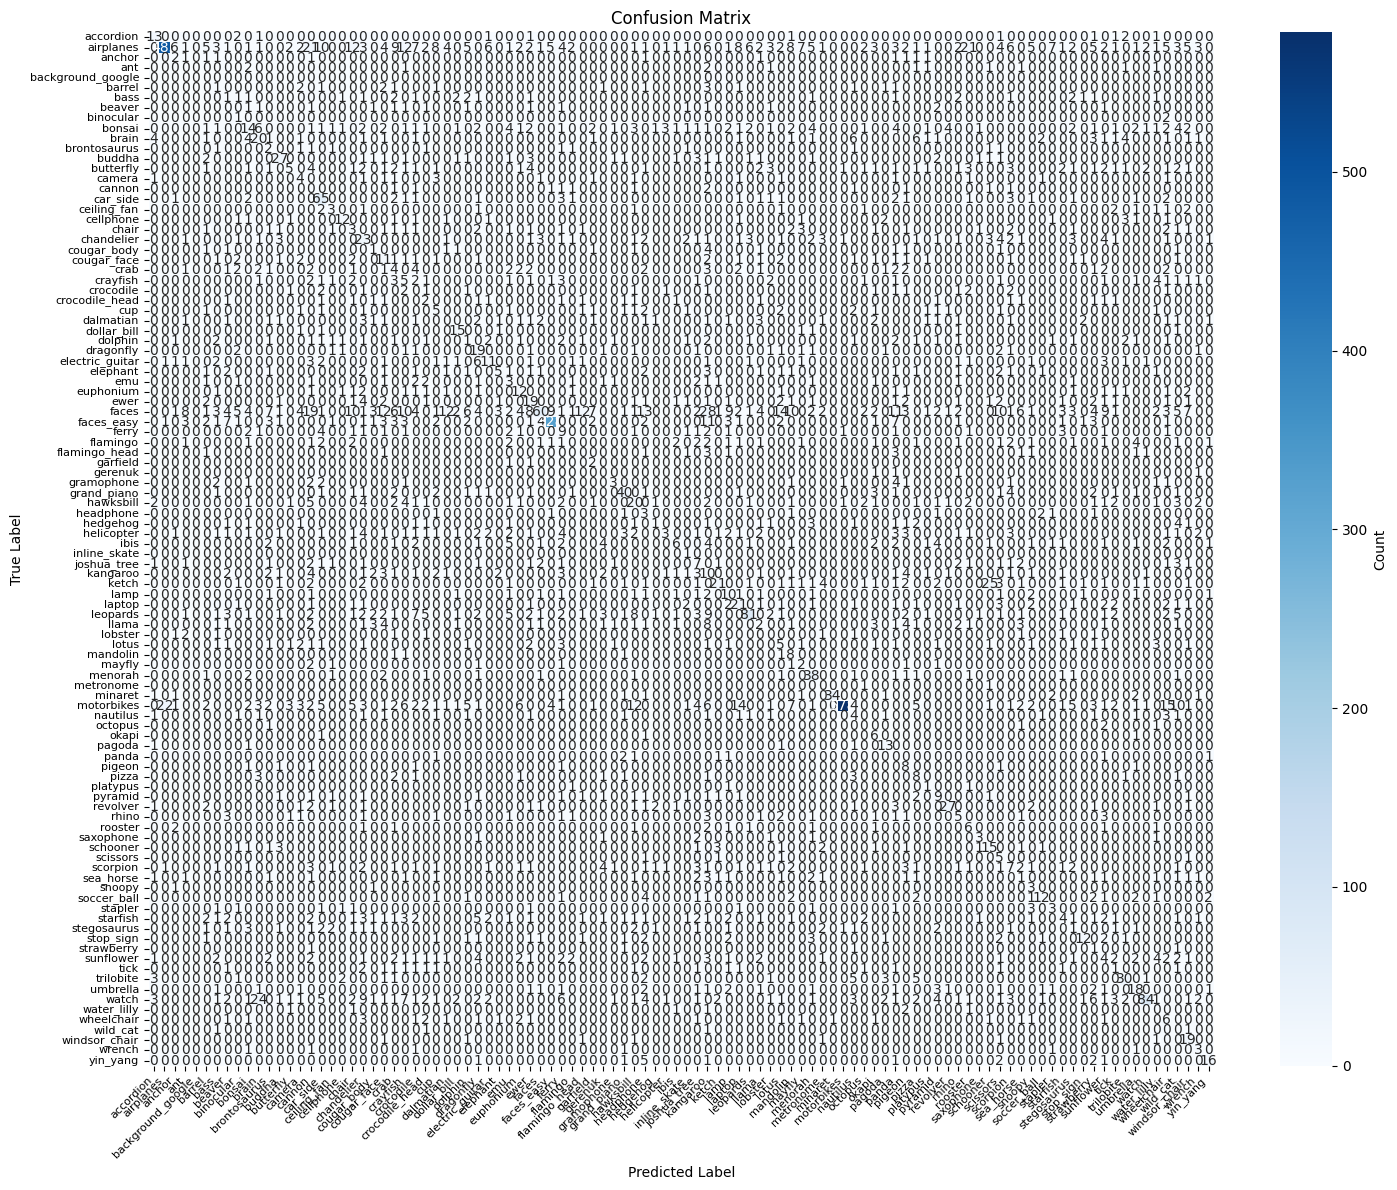

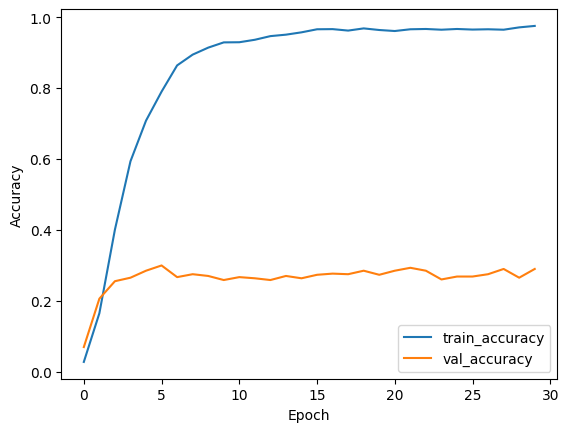

In [14]:

# model with dropout 0.2 + 30 epochs
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=30, validation_data=val_data)

print_results()


Epoch 1/30


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 272ms/step - accuracy: 0.0098 - loss: 4.6557 - val_accuracy: 0.0148 - val_loss: 4.3531
Epoch 2/30


/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.0142 - loss: 4.3738 - val_accuracy: 0.0444 - val_loss: 4.2989
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 294ms/step - accuracy: 0.0669 - loss: 4.3067 - val_accuracy: 0.1743 - val_loss: 3.6051
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.2323 - loss: 3.1965 - val_accuracy: 0.1760 - val_loss: 3.4997
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 264ms/step - accuracy: 0.3501 - loss: 2.7772 - val_accuracy: 0.2566 - val_loss: 3.3516
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.5119 - loss: 1.8278 - val_accuracy: 0.2664 - val_loss: 3.5023
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 257ms/step - accuracy: 0.6168 - loss: 1.5763 - val_accuracy: 0.2664 - val_loss: 3.8513
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.7288 - loss: 0.8498 - val_accuracy: 0.2747 - val_loss: 4.2877
Epoch 9/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 272ms/step - accuracy: 0.7951 - loss: 0.7354 - val_accuracy: 0.2763 - val

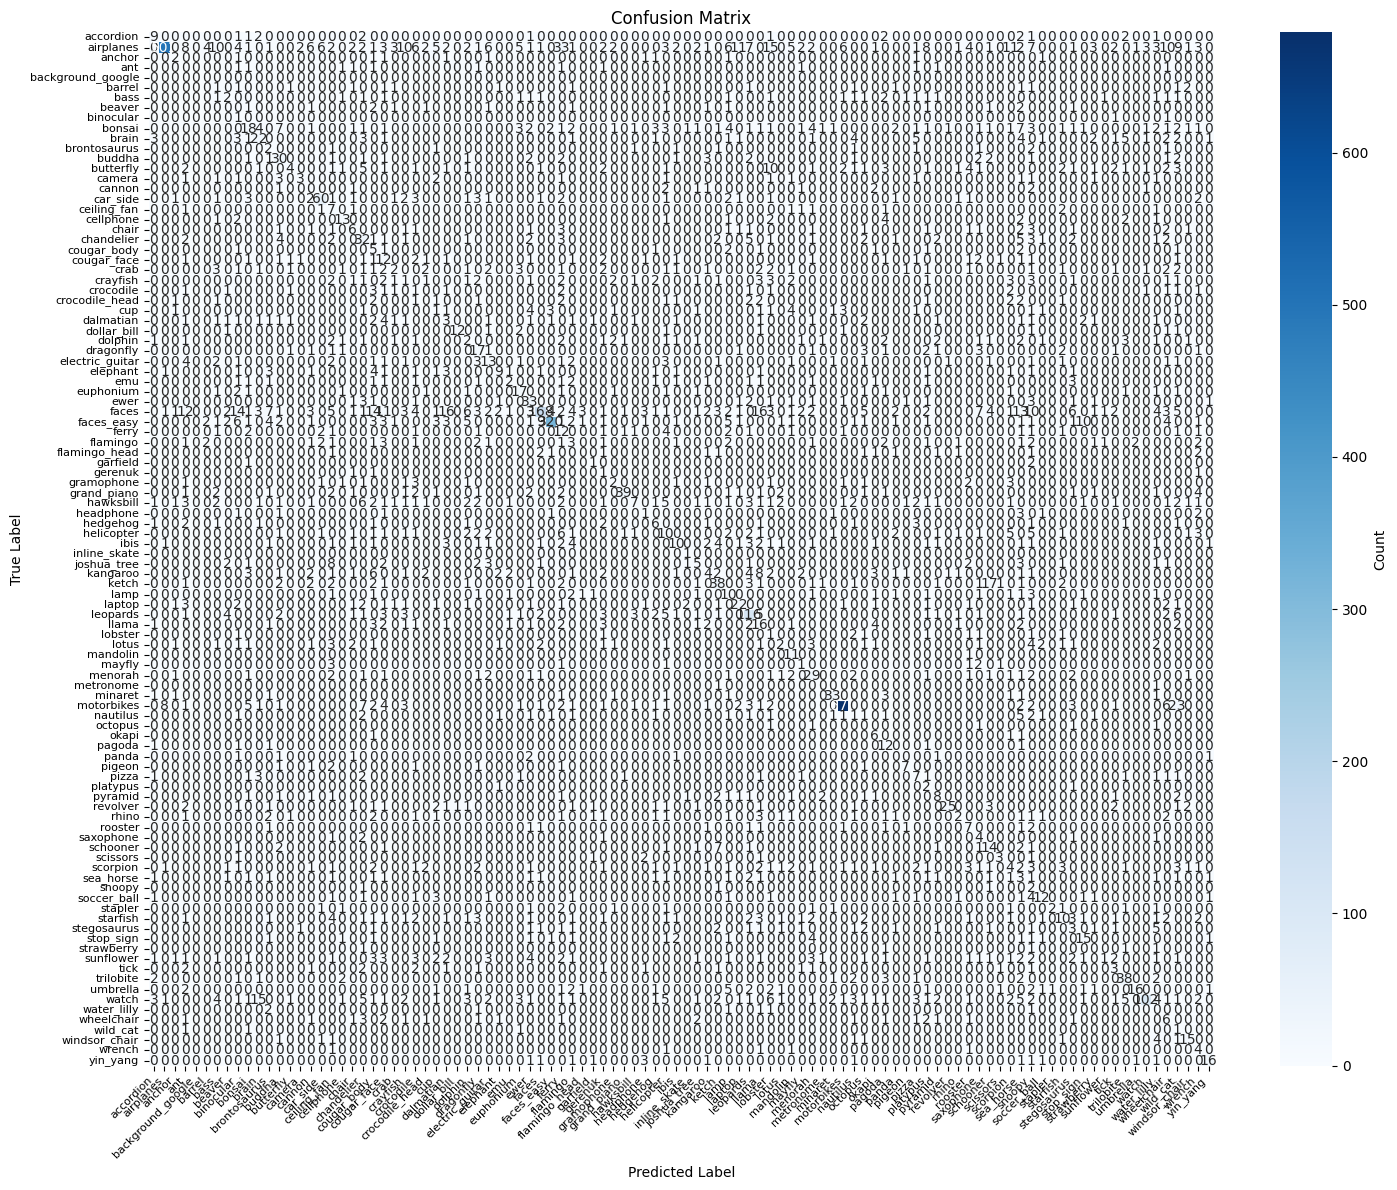

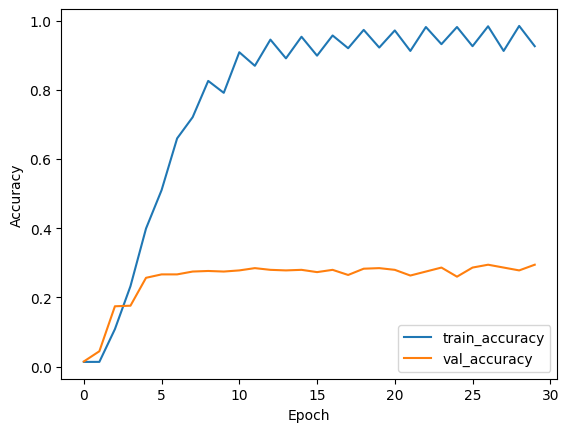

In [15]:
def create_model():
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                            input_shape=(128, 128, 1)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))   

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])    
    
    return model

model = create_model()
history = model.fit(train_data, steps_per_epoch=60, epochs=30, validation_data=val_data, validation_steps=20)

print_results()

Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     75/Unknown 24s 289ms/step - accuracy: 0.0107 - loss: 4.6341

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 310ms/step - accuracy: 0.0107 - loss: 4.6332 - val_accuracy: 0.0049 - val_loss: 4.3827
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 376ms/step - accuracy: 0.0176 - loss: 4.6158 - val_accuracy: 0.0066 - val_loss: 4.3019
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 357ms/step - accuracy: 0.0237 - loss: 4.4196 - val_accuracy: 0.0395 - val_loss: 4.0861
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 383ms/step - accuracy: 0.0679 - loss: 4.1616 - val_accuracy: 0.0806 - val_loss: 3.8905
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 346ms/step - accuracy: 0.1260 - loss: 3.8188 - val_accuracy: 0.1283 - val_loss: 3.7106
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 366ms/step - accuracy: 0.2100 - loss: 3.4431 - val_accuracy: 0.1661 - val_loss: 3.7032
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 351ms/step - accuracy: 0.2678 - loss: 3.0686 - val_accuracy: 0.2089 - val_loss: 3.6697
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 382ms/step - accuracy: 0.3392 - loss: 2.7051 - val_accuracy: 0.222

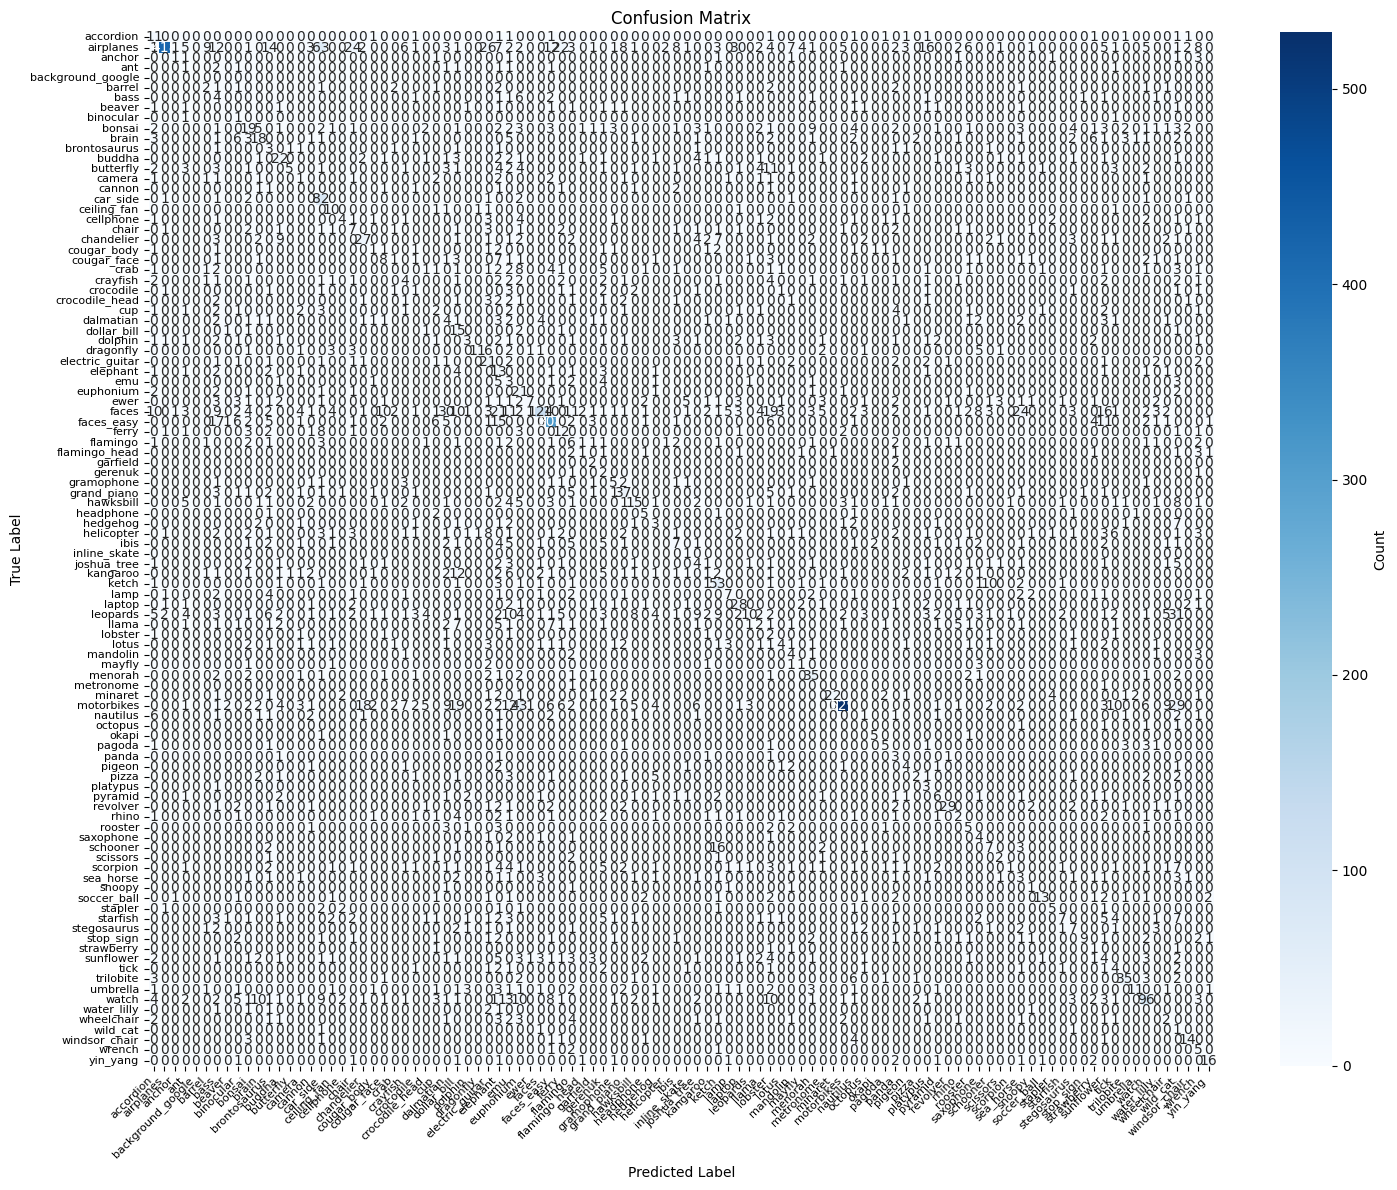

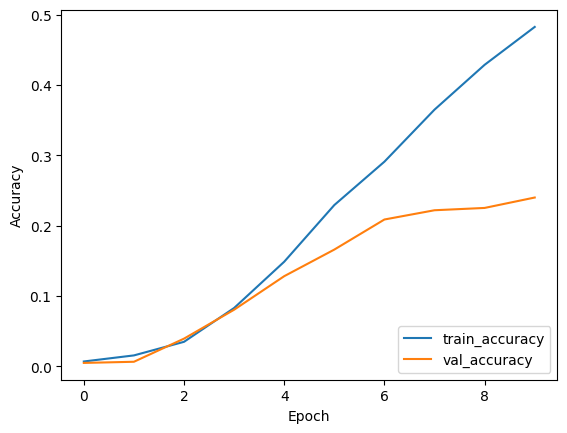

In [16]:
# model with more layers with more units

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
    
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),        
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Increased dense layer size
        tf.keras.layers.Dropout(0.1),  # Higher dropout to regularize
        
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()

Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     75/Unknown 29s 345ms/step - accuracy: 0.0105 - loss: 4.6357

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 374ms/step - accuracy: 0.0105 - loss: 4.6349 - val_accuracy: 0.0033 - val_loss: 4.3831
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 399ms/step - accuracy: 0.0101 - loss: 4.6215 - val_accuracy: 0.0033 - val_loss: 4.3859
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 377ms/step - accuracy: 0.0083 - loss: 4.6195 - val_accuracy: 0.0033 - val_loss: 4.3904
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 372ms/step - accuracy: 0.0107 - loss: 4.6181 - val_accuracy: 0.0033 - val_loss: 4.3955
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 397ms/step - accuracy: 0.0135 - loss: 4.6162 - val_accuracy: 0.0016 - val_loss: 4.3989
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 225ms/step - accuracy: 0.0109 - loss: 4.6161 - val_accuracy: 0.0016 - val_loss: 4.4006
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 278ms/step - accuracy: 0.0137 - loss: 4.6155 - val_accuracy: 0.0016 - val_loss: 4.4019
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 356ms/step - accuracy: 0.0121 - loss: 4.6157 - val_accuracy: 0.001

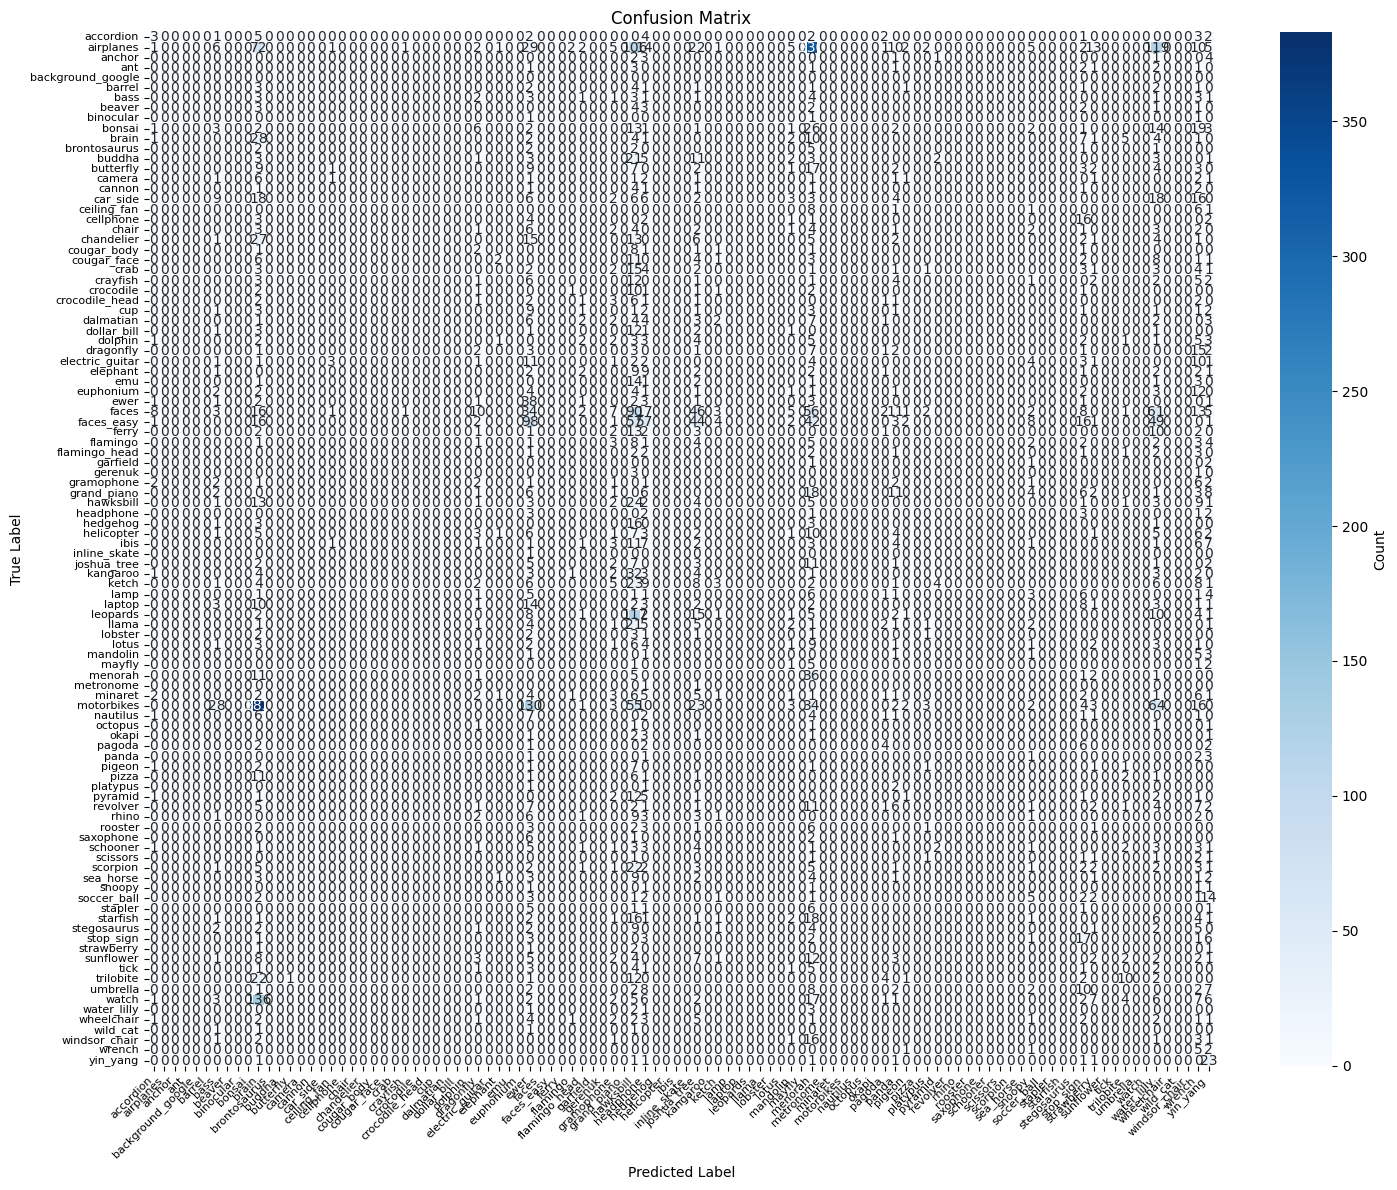

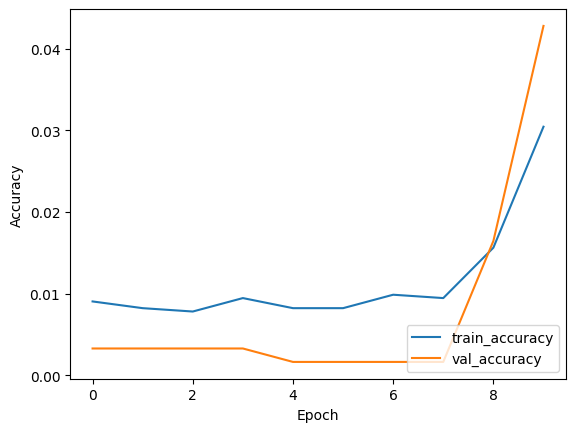

In [17]:
# model with more dropout and more layers with more units

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),  # Increased dense layer size
        tf.keras.layers.Dropout(0.1),  # Higher dropout to regularize
        
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()

Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     75/Unknown 11s 122ms/step - accuracy: 0.0093 - loss: 4.6311

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.0093 - loss: 4.6303 - val_accuracy: 0.0164 - val_loss: 4.3699
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.0295 - loss: 4.5563 - val_accuracy: 0.0576 - val_loss: 4.0611
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.1191 - loss: 4.0023 - val_accuracy: 0.1859 - val_loss: 3.5335
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.2109 - loss: 3.3810

2024-10-30 20:23:56.163170: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.2112 - loss: 3.3787 - val_accuracy: 0.2599 - val_loss: 3.2044
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.3216 - loss: 2.8584 - val_accuracy: 0.2829 - val_loss: 3.1085
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.4059 - loss: 2.4516 - val_accuracy: 0.3125 - val_loss: 3.0041
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.4543 - loss: 2.0575 - val_accuracy: 0.3339 - val_loss: 2.9831
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.5425 - loss: 1.7243 - val_accuracy: 0.3372 - val_loss: 3.0121
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.6029 - loss: 1.4938 - val_accuracy: 0.3602 - val_loss: 3.1108
Epoch 10/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.6524 - loss: 1.2587 - val_accuracy: 0.3536 - val_loss: 3.1603
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step
Accuracy: 48.63%


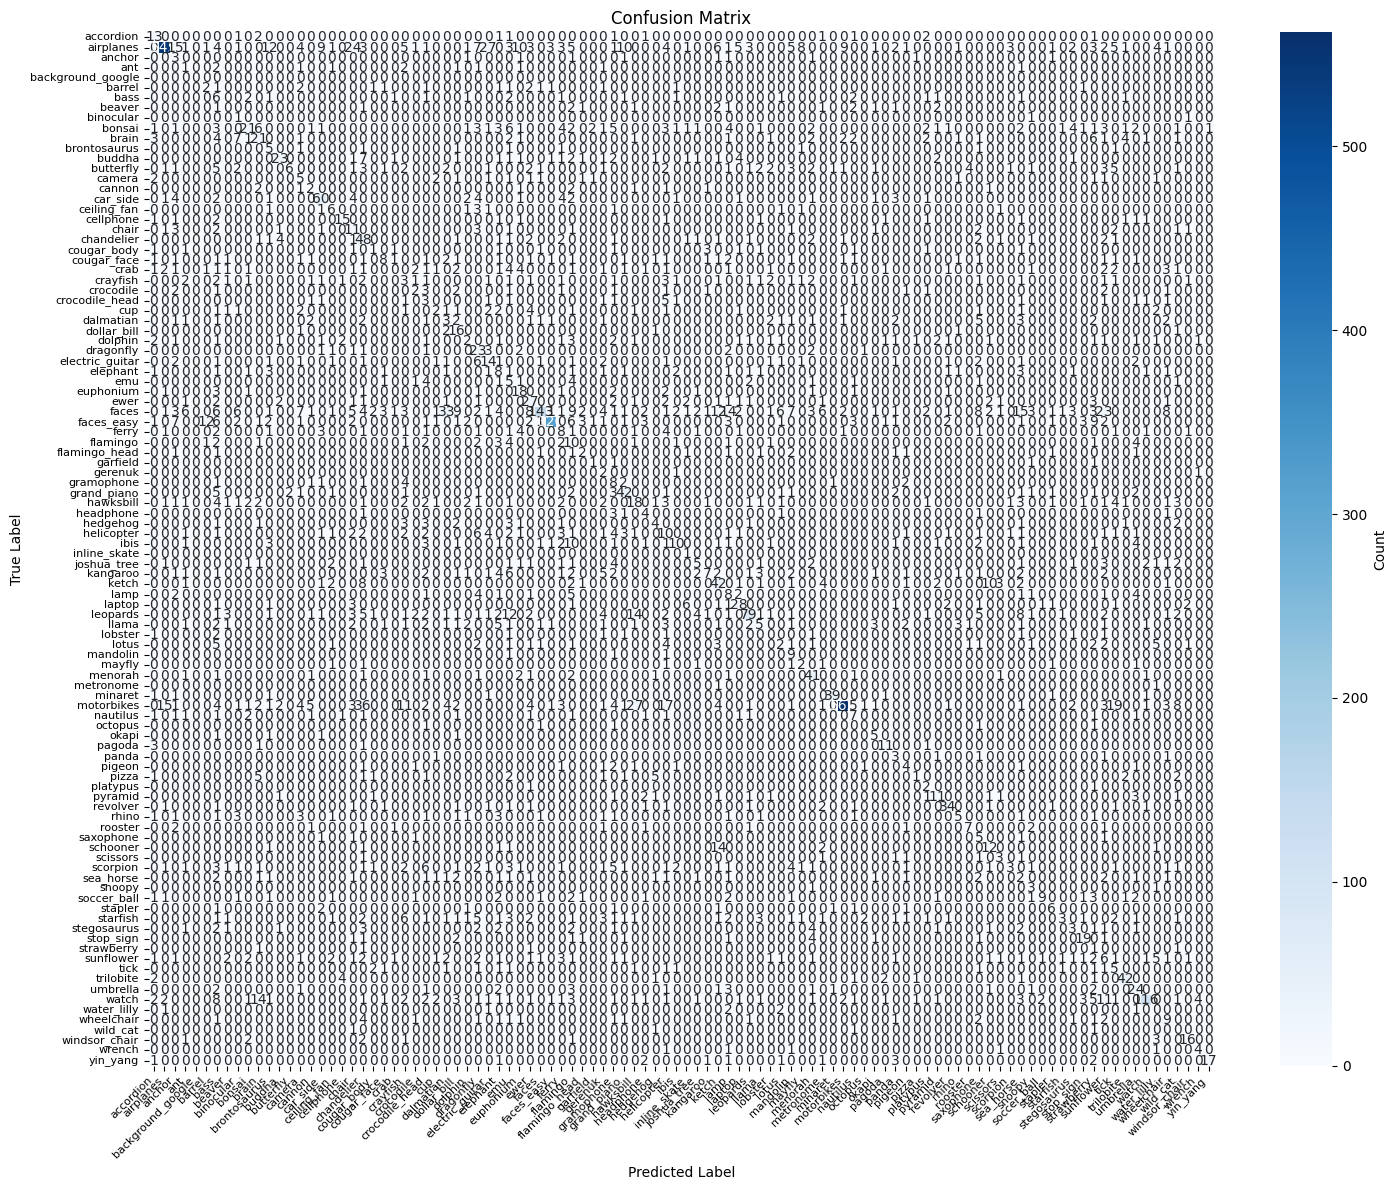

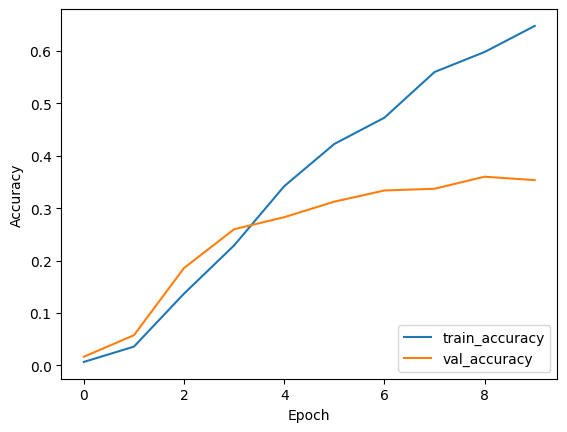

In [18]:

# model with dropout 0.2 and pooling 3x3
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     75/Unknown 20s 236ms/step - accuracy: 0.0103 - loss: 4.6408

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 255ms/step - accuracy: 0.0104 - loss: 4.6397 - val_accuracy: 0.0280 - val_loss: 4.3252
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 274ms/step - accuracy: 0.0664 - loss: 4.2924 - val_accuracy: 0.1447 - val_loss: 3.7367
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 302ms/step - accuracy: 0.2723 - loss: 3.1657 - val_accuracy: 0.2138 - val_loss: 3.4838
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 255ms/step - accuracy: 0.4871 - loss: 2.1109 - val_accuracy: 0.2105 - val_loss: 3.9786
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 289ms/step - accuracy: 0.5807 - loss: 1.6442 - val_accuracy: 0.2286 - val_loss: 4.2970
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 289ms/step - accuracy: 0.7024 - loss: 1.0799 - val_accuracy: 0.2188 - val_loss: 5.3191
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 240ms/step - accuracy: 0.7751 - loss: 0.7838 - val_accuracy: 0.2319 - val_loss: 5.4883
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 251ms/step - accuracy: 0.8383 - loss: 0.5957 - val_accuracy: 0.225

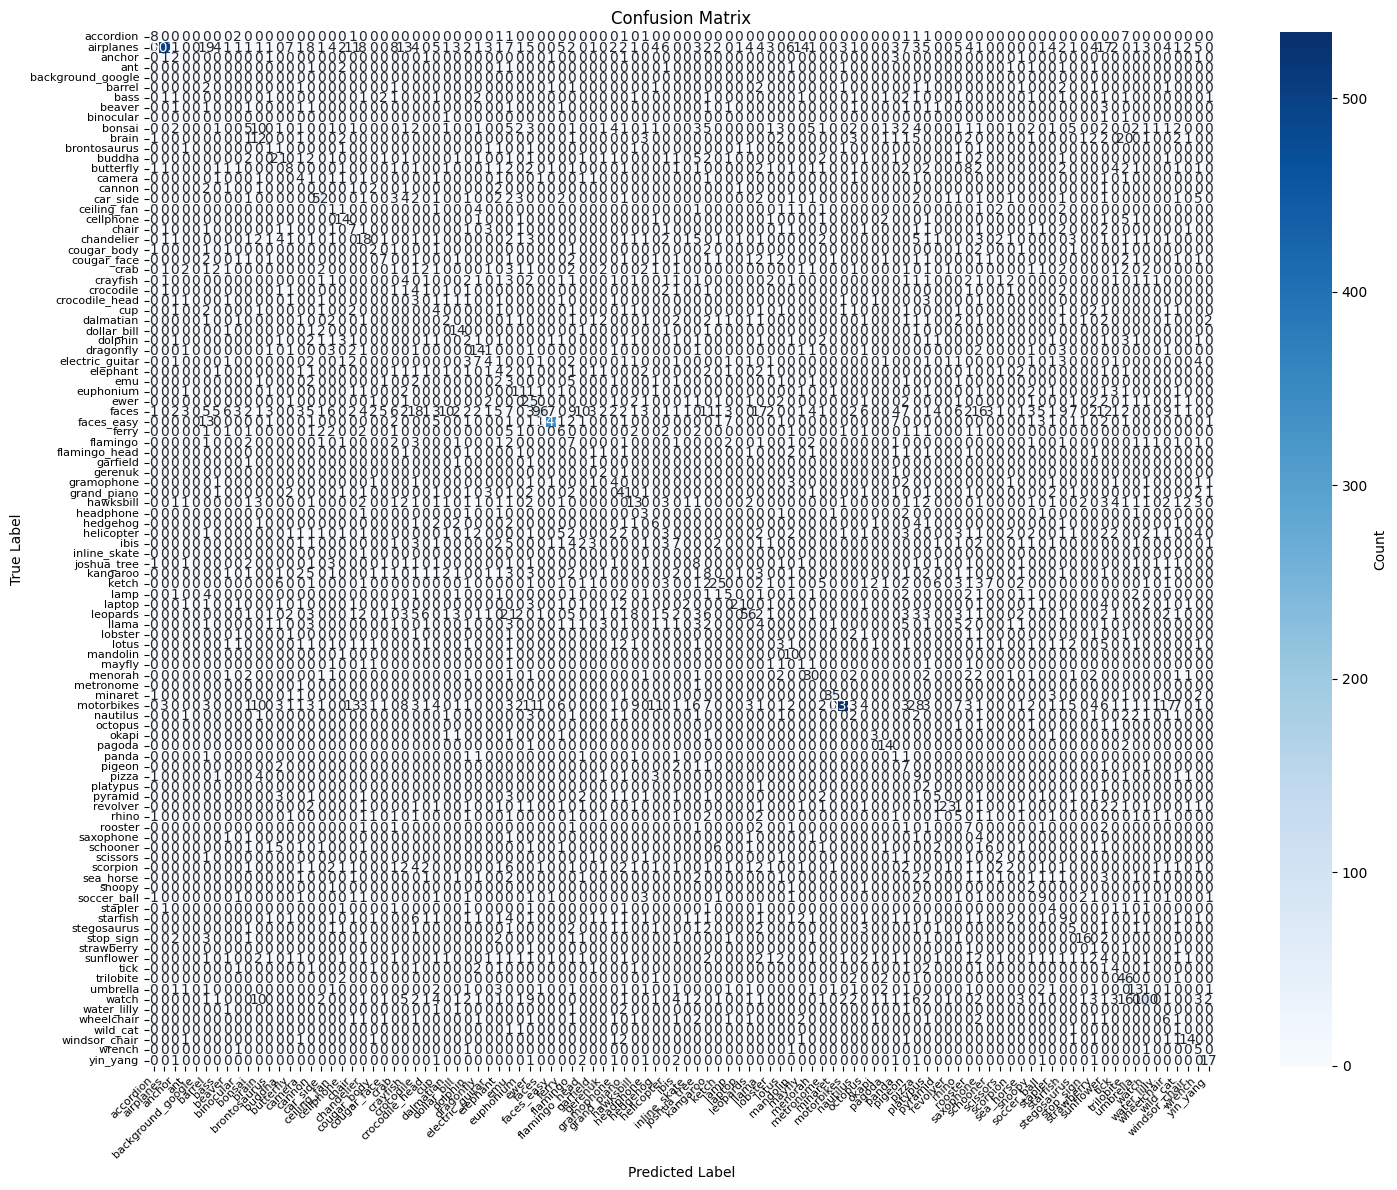

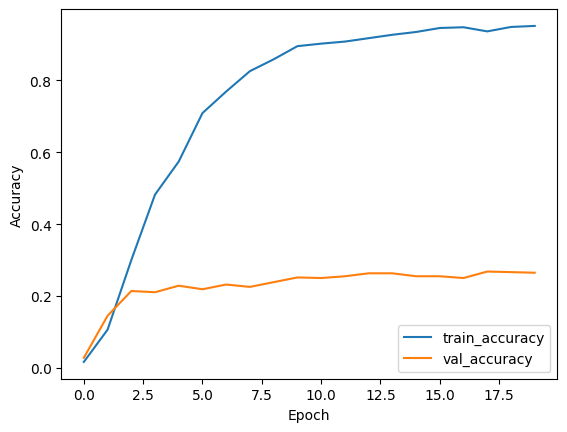

In [19]:

# model with dropout 0.2 and more epochs
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()


Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     75/Unknown 12s 136ms/step - accuracy: 0.0082 - loss: 4.6304

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.0082 - loss: 4.6295 - val_accuracy: 0.0099 - val_loss: 4.3739
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.0247 - loss: 4.5681 - val_accuracy: 0.0329 - val_loss: 4.1663
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.0857 - loss: 4.1059 - val_accuracy: 0.1234 - val_loss: 3.6216
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.1923 - loss: 3.5041 - val_accuracy: 0.2286 - val_loss: 3.2498
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.2739 - loss: 3.0479 - val_accuracy: 0.2549 - val_loss: 3.0574
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - accuracy: 0.3402 - loss: 2.7011 - val_accuracy: 0.2763 - val_loss: 2.9980
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 0.4091 - loss: 2.3905 - val_accuracy: 0.2812 - val_loss: 2.9860
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.4551 - loss: 2.1145 - val_accuracy: 0.2845 - v

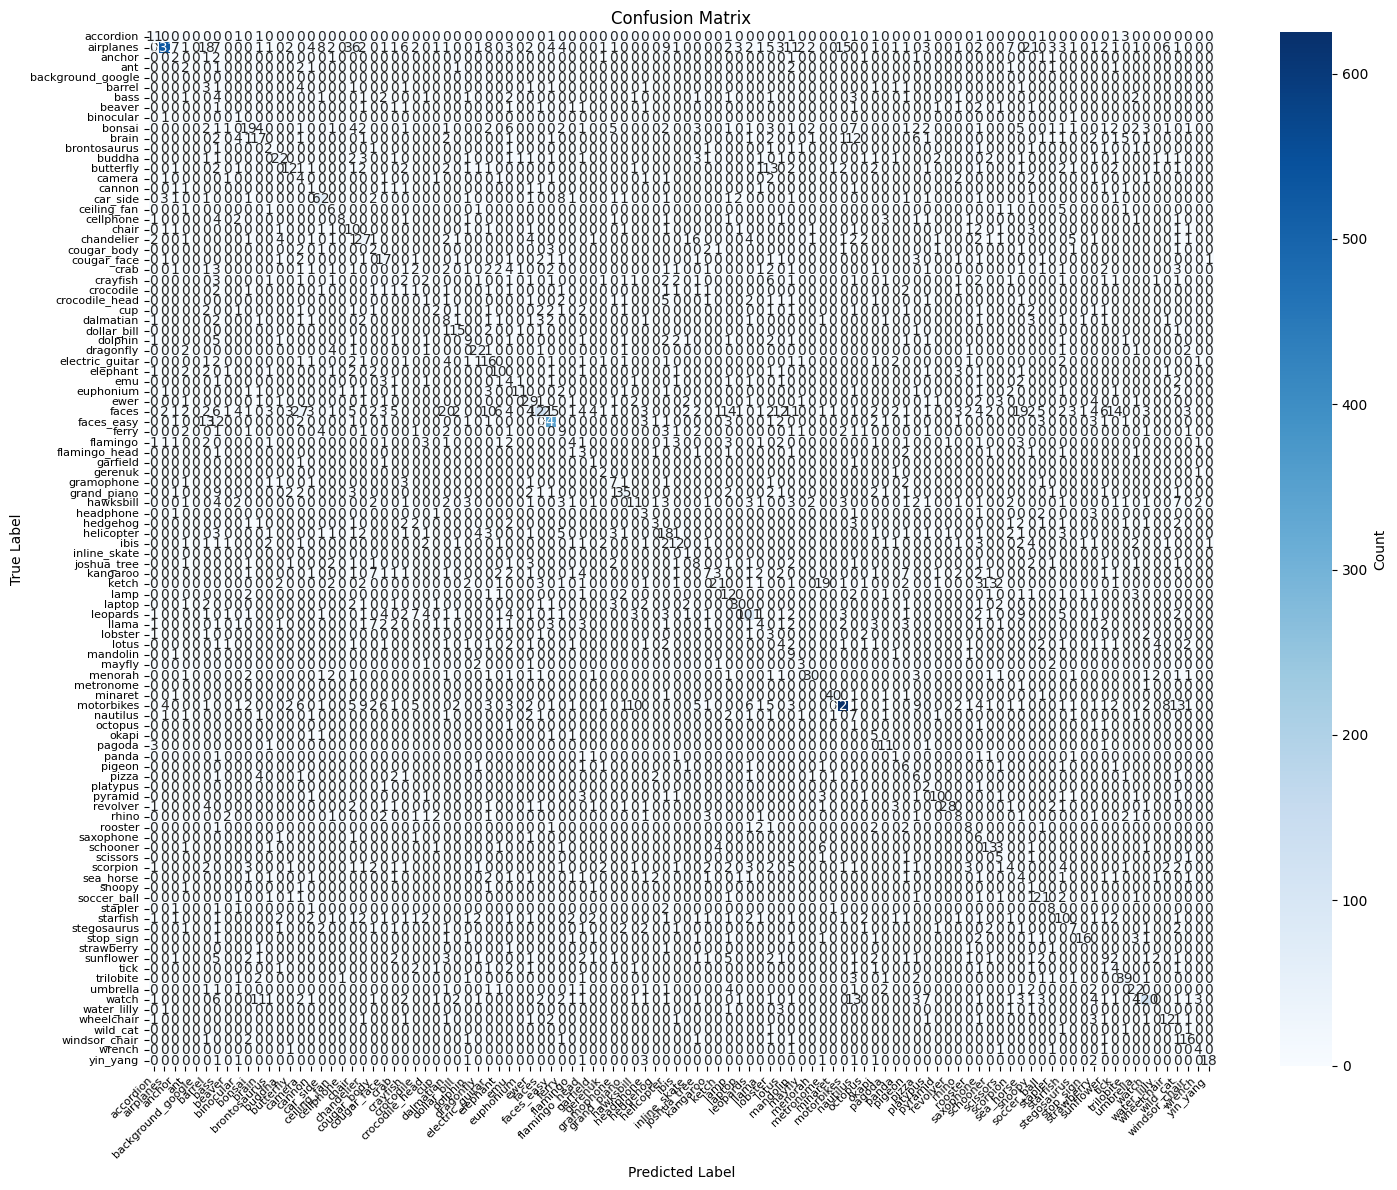

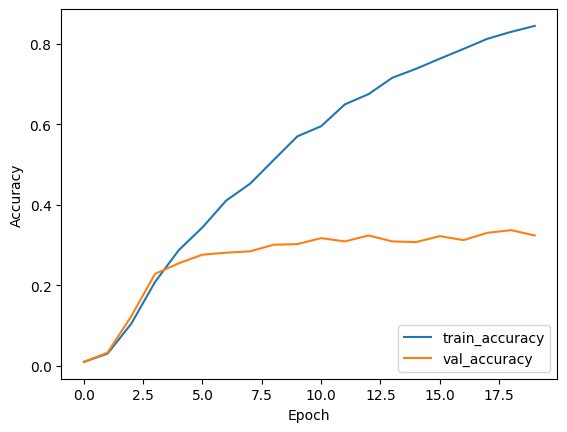

In [20]:
# model with dropout 0.2 and pooling 3x3 and more epochs
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()

Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     75/Unknown 39s 471ms/step - accuracy: 0.0353 - loss: 5.1171

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 499ms/step - accuracy: 0.0357 - loss: 5.1109 - val_accuracy: 0.0082 - val_loss: 6.4170
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 36s 481ms/step - accuracy: 0.1419 - loss: 3.8329 - val_accuracy: 0.0082 - val_loss: 10.0606
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 333ms/step - accuracy: 0.2751 - loss: 3.1650 - val_accuracy: 0.0082 - val_loss: 9.9142
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 34s 450ms/step - accuracy: 0.3839 - loss: 2.6184 - val_accuracy: 0.0115 - val_loss: 9.9902
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 511ms/step - accuracy: 0.5093 - loss: 2.1334 - val_accuracy: 0.0148 - val_loss: 9.0590
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 556ms/step - accuracy: 0.6176 - loss: 1.7293 - val_accuracy: 0.0493 - val_loss: 6.7120
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 518ms/step - accuracy: 0.6781 - loss: 1.4356 - val_accuracy: 0.0839 - val_loss: 4.8221
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 565ms/step - accuracy: 0.7393 - loss: 1.1924 - val_accuracy: 0.17

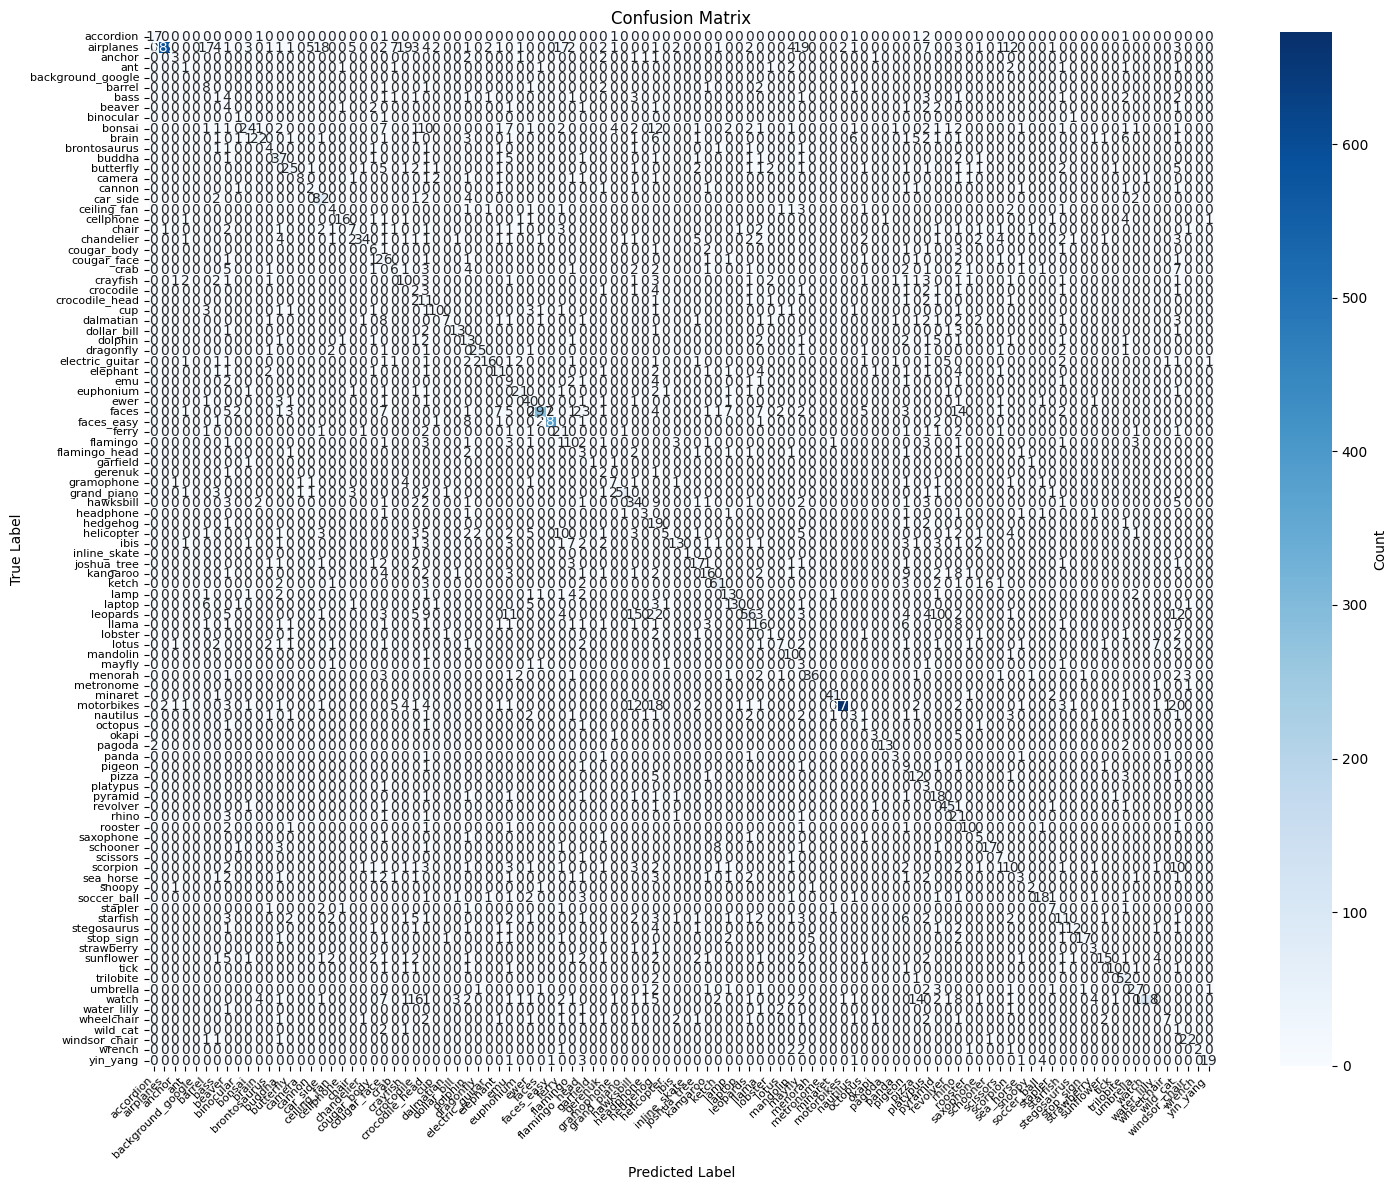

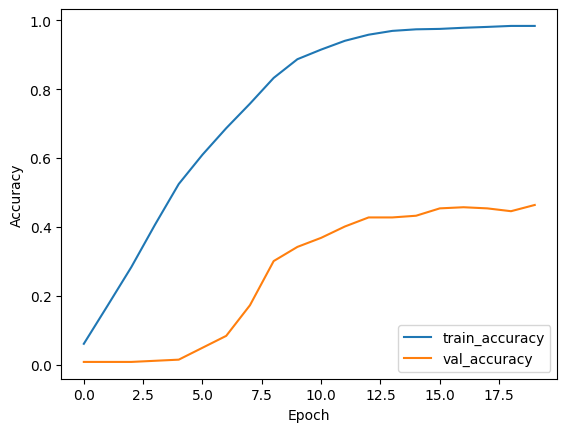

In [21]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  # Additional layer
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Increased dense layer size
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),  # Higher dropout to regularize

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

# Compile with a lower learning rate
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()


Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     75/Unknown 48s 608ms/step - accuracy: 0.0160 - loss: 4.7864

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 51s 651ms/step - accuracy: 0.0162 - loss: 4.7833 - val_accuracy: 0.0822 - val_loss: 4.0585
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 45s 595ms/step - accuracy: 0.2243 - loss: 3.5282 - val_accuracy: 0.2188 - val_loss: 3.7496
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 48s 640ms/step - accuracy: 0.7045 - loss: 1.1626 - val_accuracy: 0.2122 - val_loss: 5.6128
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 45s 601ms/step - accuracy: 0.9085 - loss: 0.3802 - val_accuracy: 0.2056 - val_loss: 6.0716
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 48s 632ms/step - accuracy: 0.9466 - loss: 0.2491 - val_accuracy: 0.2204 - val_loss: 6.4989
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 615ms/step - accuracy: 0.9747 - loss: 0.1057 - val_accuracy: 0.2138 - val_loss: 7.1651
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 51s 673ms/step - accuracy: 0.9827 - loss: 0.0679 - val_accuracy: 0.2039 - val_loss: 7.9220
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 610ms/step - accuracy: 0.9778 - loss: 0.1067 - val_accuracy: 0.248

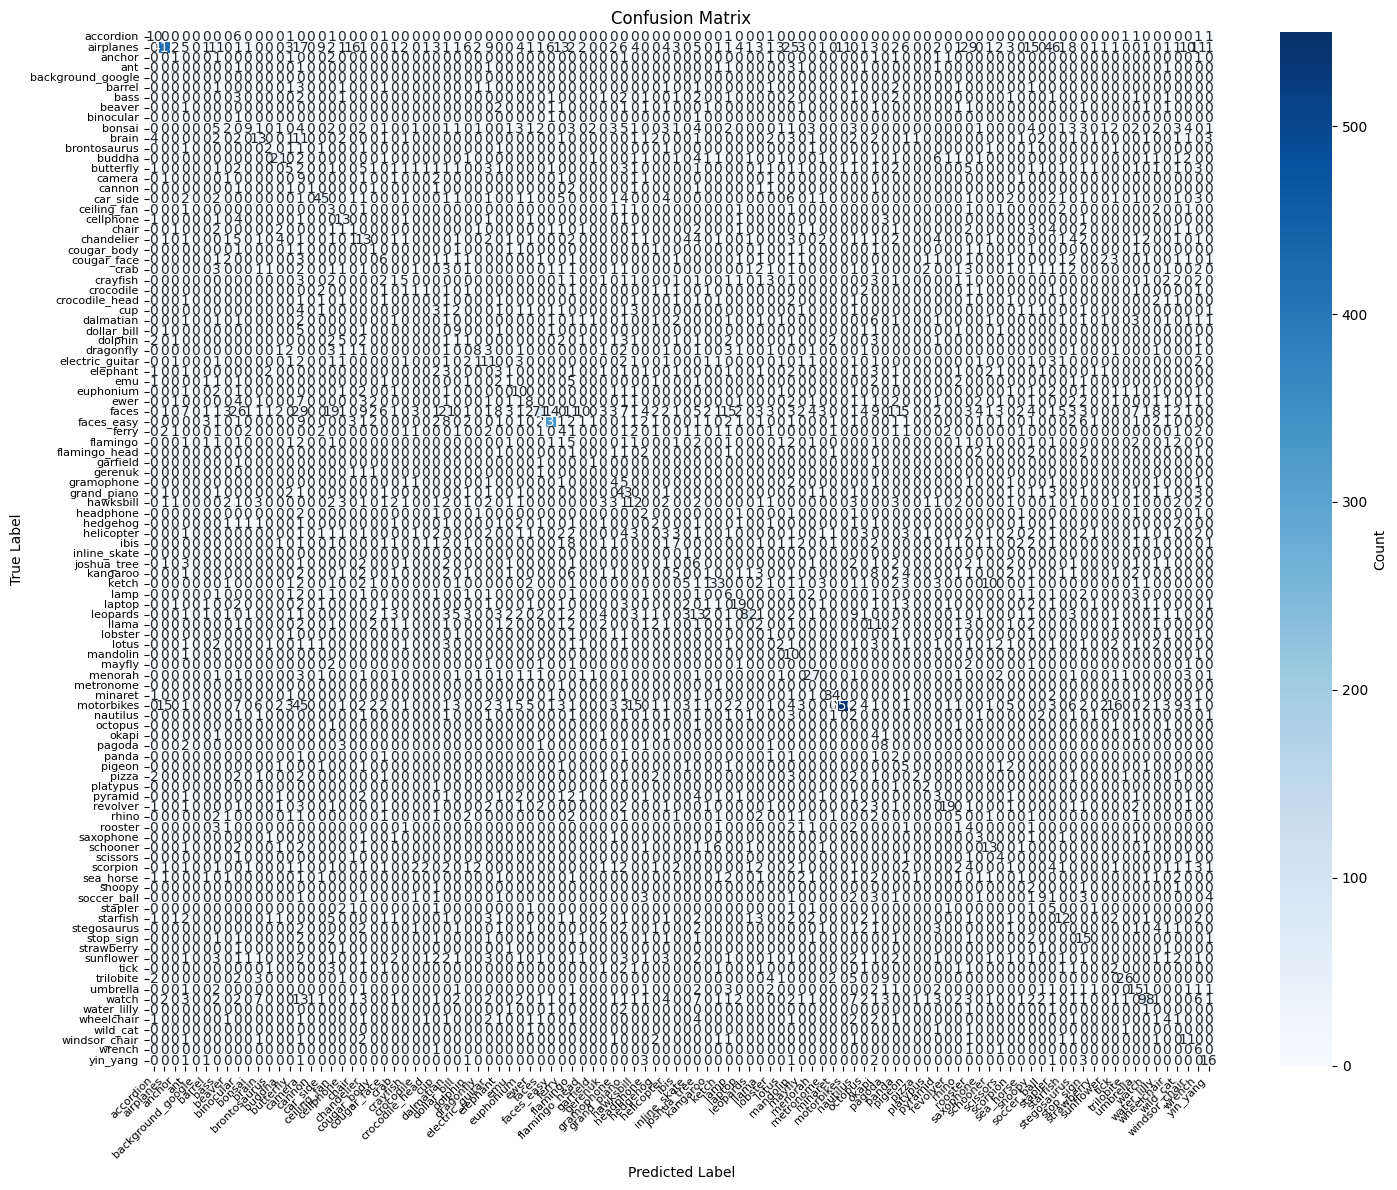

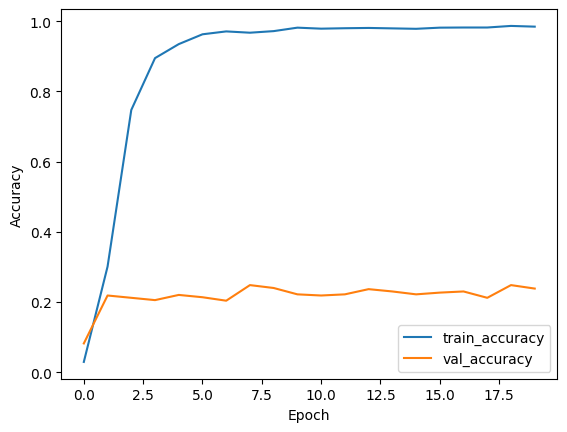

In [22]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Reduced dense layer size
        tf.keras.layers.Dropout(0.1),  # Increased dropout rate
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)


model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()

Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     75/Unknown 54s 696ms/step - accuracy: 0.0202 - loss: 4.7116

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 58s 743ms/step - accuracy: 0.0204 - loss: 4.7088 - val_accuracy: 0.0954 - val_loss: 3.9893
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 49s 650ms/step - accuracy: 0.2025 - loss: 3.5872 - val_accuracy: 0.2039 - val_loss: 3.9032
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 48s 643ms/step - accuracy: 0.5417 - loss: 1.8690 - val_accuracy: 0.2401 - val_loss: 4.4083
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 50s 652ms/step - accuracy: 0.8136 - loss: 0.6849 - val_accuracy: 0.2401 - val_loss: 5.7717
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 50s 662ms/step - accuracy: 0.8954 - loss: 0.3369 - val_accuracy: 0.2286 - val_loss: 6.0514
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 74s 996ms/step - accuracy: 0.9663 - loss: 0.1554 - val_accuracy: 0.2599 - val_loss: 5.8439
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 50s 661ms/step - accuracy: 0.9658 - loss: 0.1451 - val_accuracy: 0.2632 - val_loss: 6.1612
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 53s 704ms/step - accuracy: 0.9803 - loss: 0.0629 - val_accuracy: 0.248

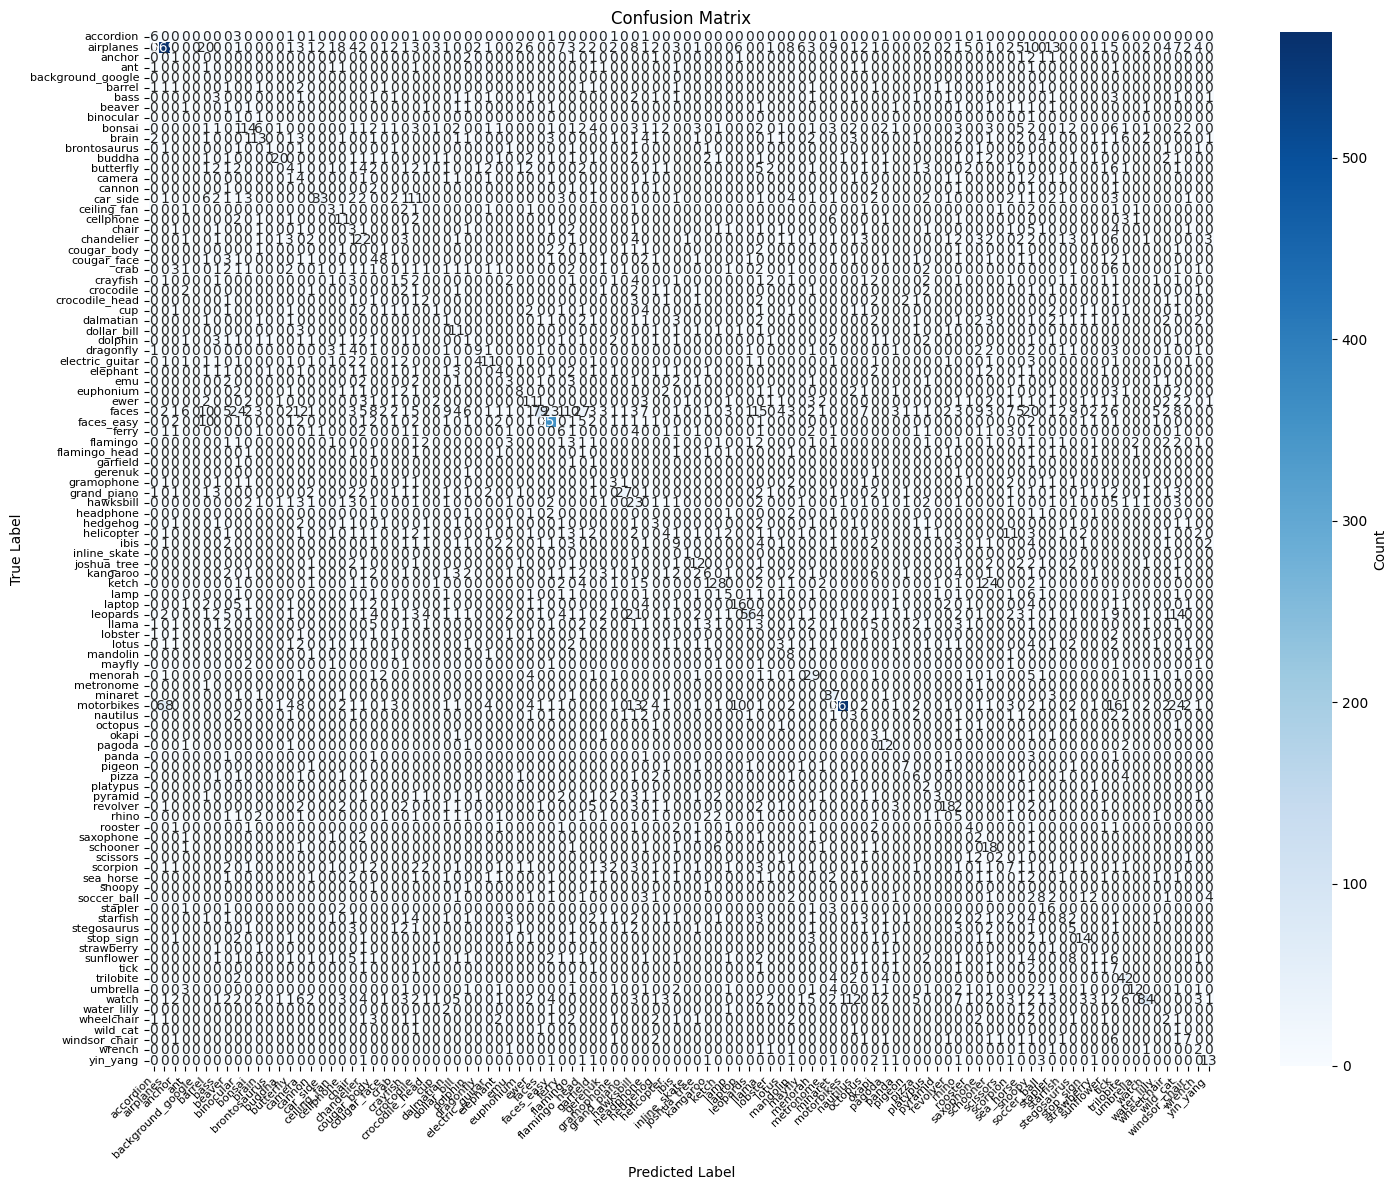

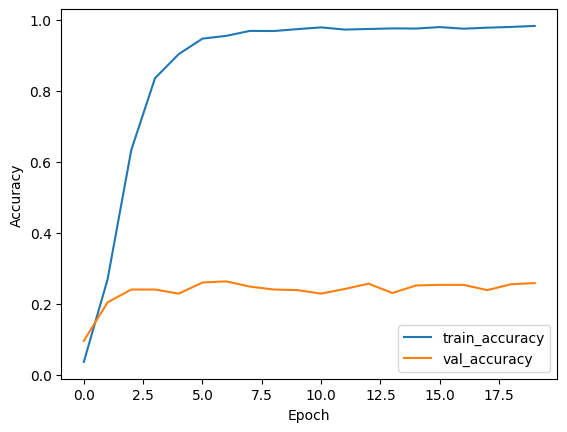

In [23]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Reduced dense layer size
        tf.keras.layers.Dropout(0.1),  # Increased dropout rate
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)


model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()

Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     75/Unknown 50s 621ms/step - accuracy: 0.0122 - loss: 4.8562

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 52s 655ms/step - accuracy: 0.0122 - loss: 4.8531 - val_accuracy: 0.0066 - val_loss: 4.8066
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 53s 709ms/step - accuracy: 0.0322 - loss: 4.5063 - val_accuracy: 0.0066 - val_loss: 5.8973
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 561ms/step - accuracy: 0.0340 - loss: 4.4557 - val_accuracy: 0.0066 - val_loss: 6.9911
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 45s 594ms/step - accuracy: 0.0455 - loss: 4.3407 - val_accuracy: 0.0148 - val_loss: 8.3691
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 536ms/step - accuracy: 0.0665 - loss: 4.2450 - val_accuracy: 0.0148 - val_loss: 8.5206
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 553ms/step - accuracy: 0.0812 - loss: 4.0918 - val_accuracy: 0.0164 - val_loss: 7.9125
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 44s 591ms/step - accuracy: 0.1051 - loss: 3.9367 - val_accuracy: 0.0115 - val_loss: 8.2024
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 537ms/step - accuracy: 0.1132 - loss: 3.8375 - val_accuracy: 0.018

2024-10-30 21:41:08.928756: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 540ms/step - accuracy: 0.2539 - loss: 2.9637 - val_accuracy: 0.1579 - val_loss: 3.9354
Epoch 20/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 45s 602ms/step - accuracy: 0.2613 - loss: 2.8949 - val_accuracy: 0.1513 - val_loss: 4.0311
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step
Accuracy: 18.06%


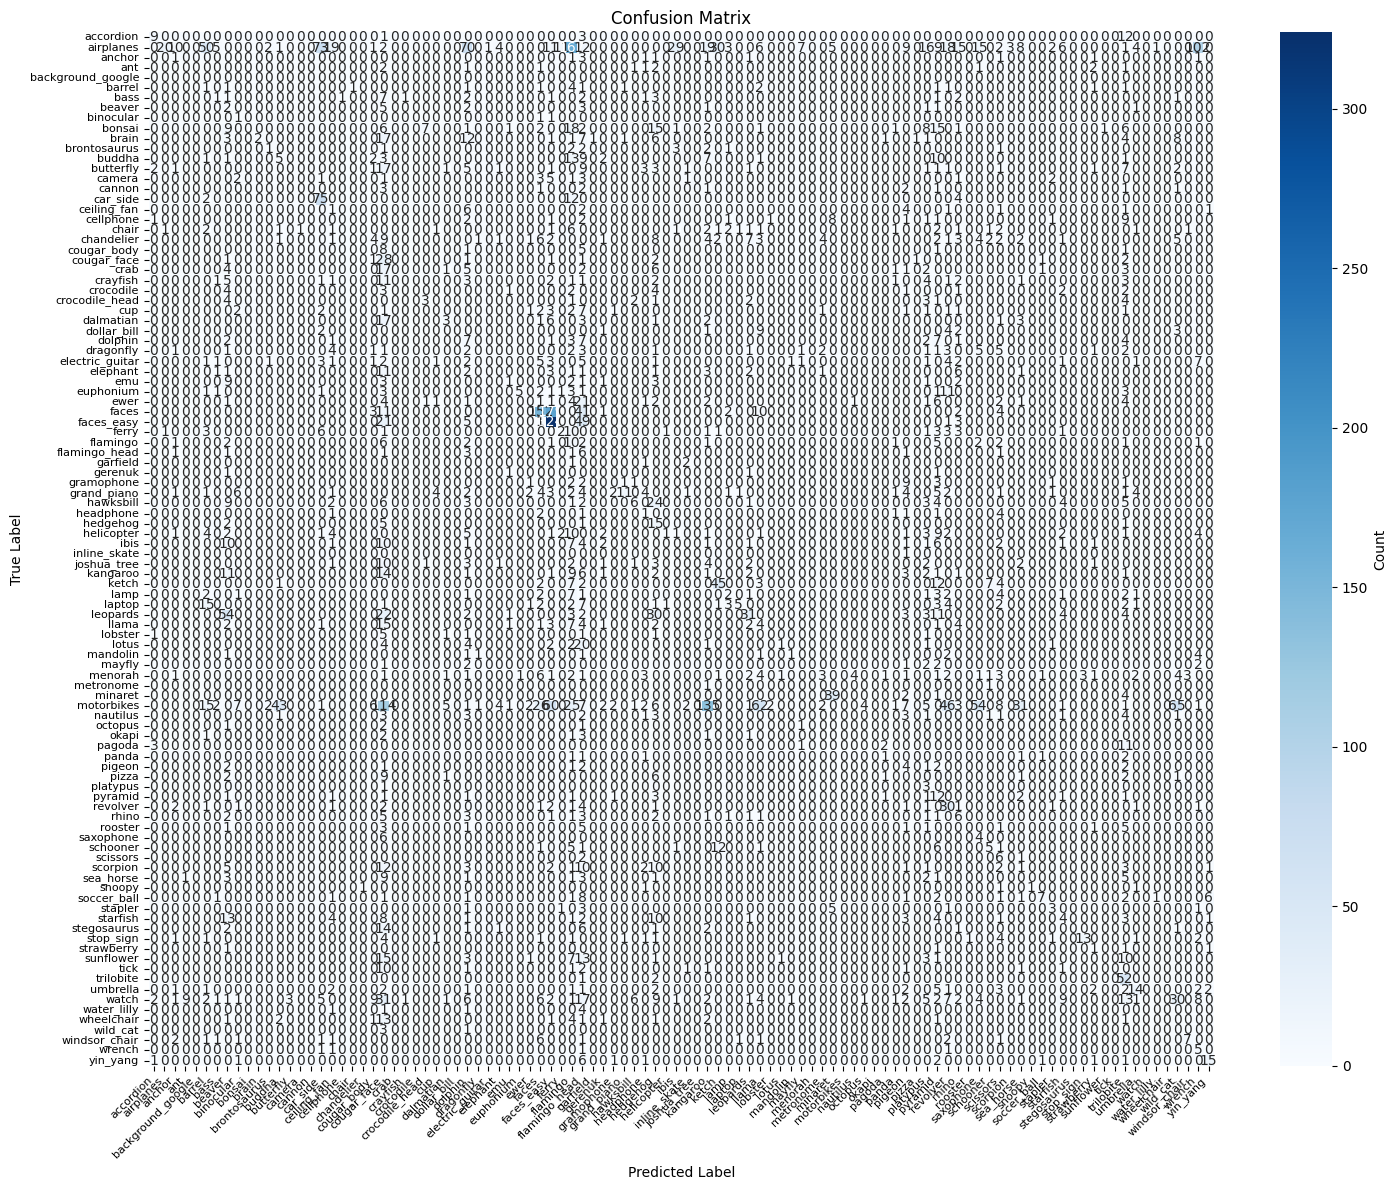

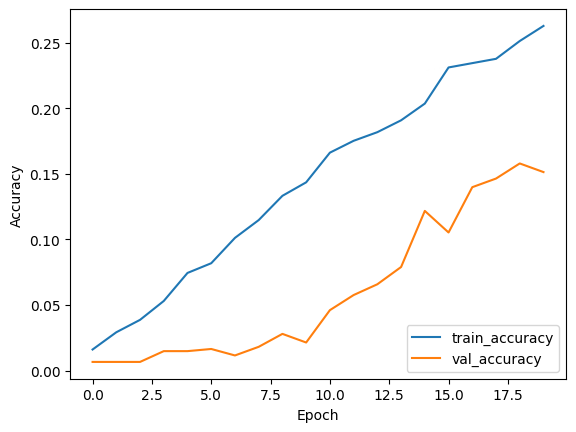

In [24]:
def create_improved_model():
    model = tf.keras.models.Sequential([
        # First Convolutional Block
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),  # Regularization

        # Second Convolutional Block
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        # Third Convolutional Block
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),

        # Fourth Convolutional Block for Deeper Feature Extraction
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),

        # Global Average Pooling instead of Flattening
        tf.keras.layers.GlobalAveragePooling2D(),

        # Fully Connected Layer
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Dropout for Dense layer

        # Output Layer
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0005,
    decay_steps=10000,
    decay_rate=0.9)

# Instantiate and compile the improved model
model = create_improved_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),  # Reduced learning rate for stability
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training the model
history = model.fit(train_data, epochs=20, validation_data=val_data)
print_results()